# CLUSTER

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [ ]:
df = pd.read_excel("/content/Clustering Clean Ads_Data-2.xlsx")

In [ ]:
df.shape

(23066, 19)

In [ ]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [ ]:
df.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,23066.000000,23066.000000,23066.000000,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,23066.000000,23066.000000,23066.000000,18330.000000,18330.000000,18330.000000
mean,385.163097,337.896037,96674.468048,2.432044e+06,1.295099e+06,1.241520e+06,10678.518816,2706.625689,0.335123,1924.252331,0.073661,7.672045,0.351061
std,233.651434,203.092885,61538.329557,4.742888e+06,2.512970e+06,2.429400e+06,17353.409363,4067.927273,0.031963,3105.238410,0.075160,6.481391,0.343334
min,120.000000,70.000000,33600.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.210000,0.000000,0.000100,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,3.367225e+04,1.828250e+04,7.990500e+03,710.000000,85.180000,0.330000,55.365375,0.002600,1.710000,0.090000
50%,300.000000,300.000000,72000.000000,4.837710e+05,2.580875e+05,2.252900e+05,4425.000000,1425.125000,0.350000,926.335000,0.082550,7.660000,0.160000
75%,720.000000,600.000000,84000.000000,2.527712e+06,1.180700e+06,1.112428e+06,12793.750000,3121.400000,0.350000,2091.338150,0.130000,12.510000,0.570000
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,1.000000,81.560000,7.260000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [ ]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [ ]:
df.duplicated().sum()

0

# TREAT THE MISSING VALUES IN CTR, CPM, AND CPC

In [ ]:
def calculate_CTR(x):
    Clicks=df.Clicks
    Impressions=df.Impressions
    CTR = ((Clicks/Impressions)*100)
    return CTR

In [ ]:
df['CTR']= df[['CTR']].apply(lambda x: calculate_CTR(x)).round(2)

In [ ]:
def calculate_CPM(x):
    Spend= df.Spend
    Impressions= df.Impressions
    CPM = ((Spend/Impressions)*1000)
    return CPM

In [ ]:
df['CPM']= df[['CPM']].apply(lambda x: calculate_CPM(x)).round(2)

In [ ]:
def calculate_CPC(x):
    Spend= df.Spend
    Clicks=df.Clicks
    CPC = (Spend/Clicks)
    return CPC

In [ ]:
df['CPC']= df[['CPC']].apply(lambda x: calculate_CPC(x)).round(2)

In [ ]:
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

# OUTLIER TREATMENT

In [ ]:
df['Ad Type'] = df['Ad Type'].astype('category')
df['Platform'] = df['Platform'].astype('category')
df['Device Type'] = df['Device Type'].astype('category')
df['Format'] = df['Format'].astype('category')

In [ ]:
df.dtypes

Timestamp                 object
InventoryType             object
Ad - Length                int64
Ad- Width                  int64
Ad Size                    int64
Ad Type                   object
Platform                  object
Device Type               object
Format                    object
Available_Impressions      int64
Matched_Queries            int64
Impressions                int64
Clicks                     int64
Spend                    float64
Fee                      float64
Revenue                  float64
CTR                      float64
CPM                      float64
CPC                      float64
clusters                   int32
dtype: object

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)

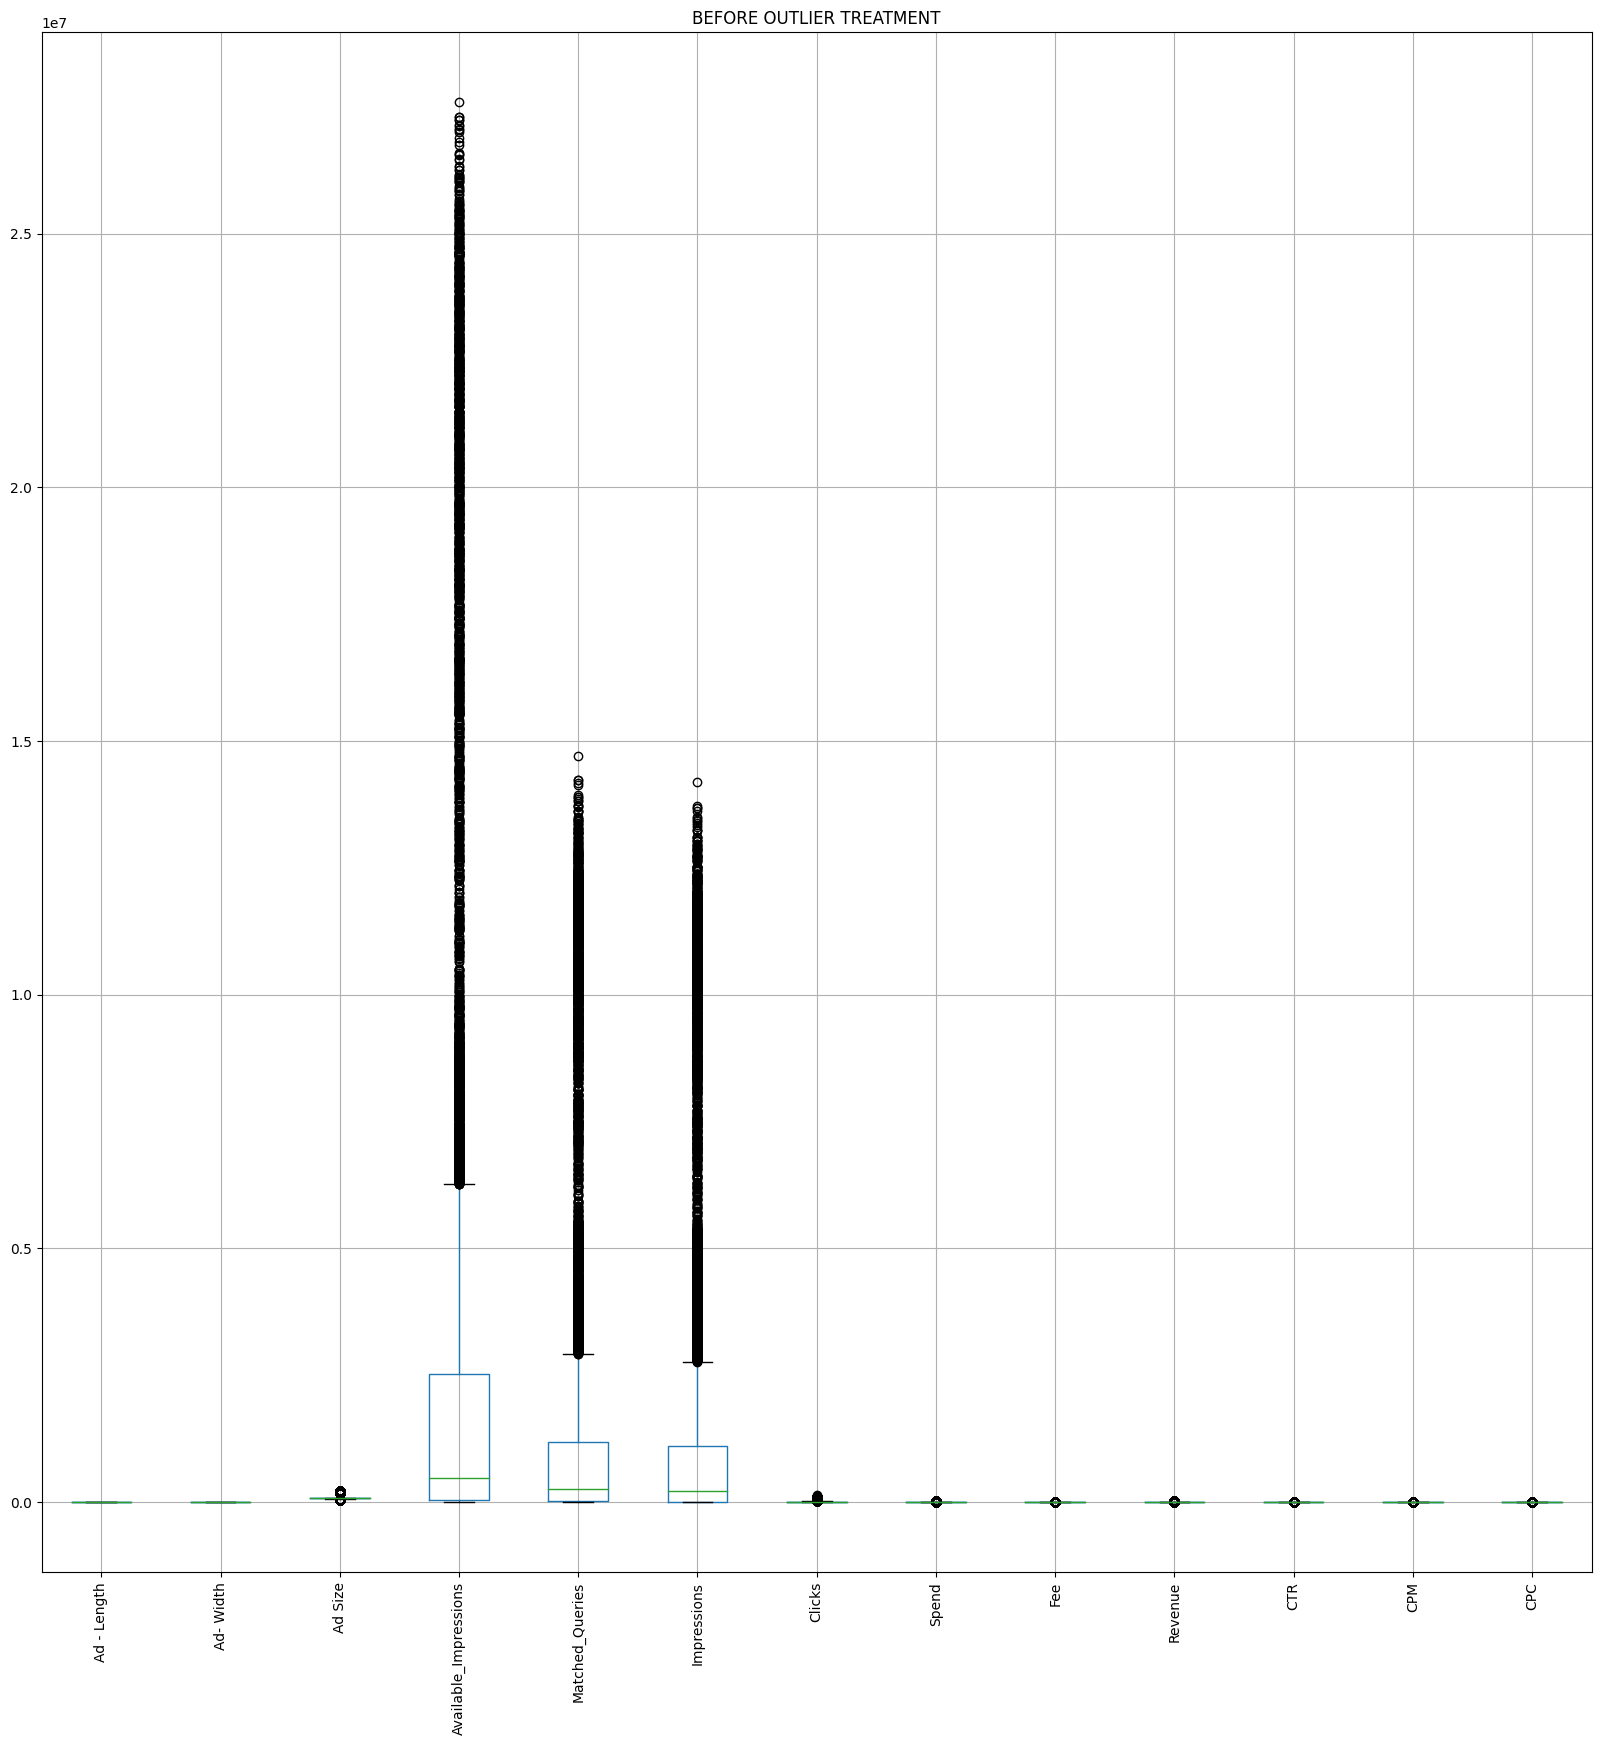

In [ ]:
df_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.title ('BEFORE OUTLIER TREATMENT')
plt.show()

In [ ]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [ ]:
for i in df_num:    
    df_num[i]=treat_outlier(df_num[i])

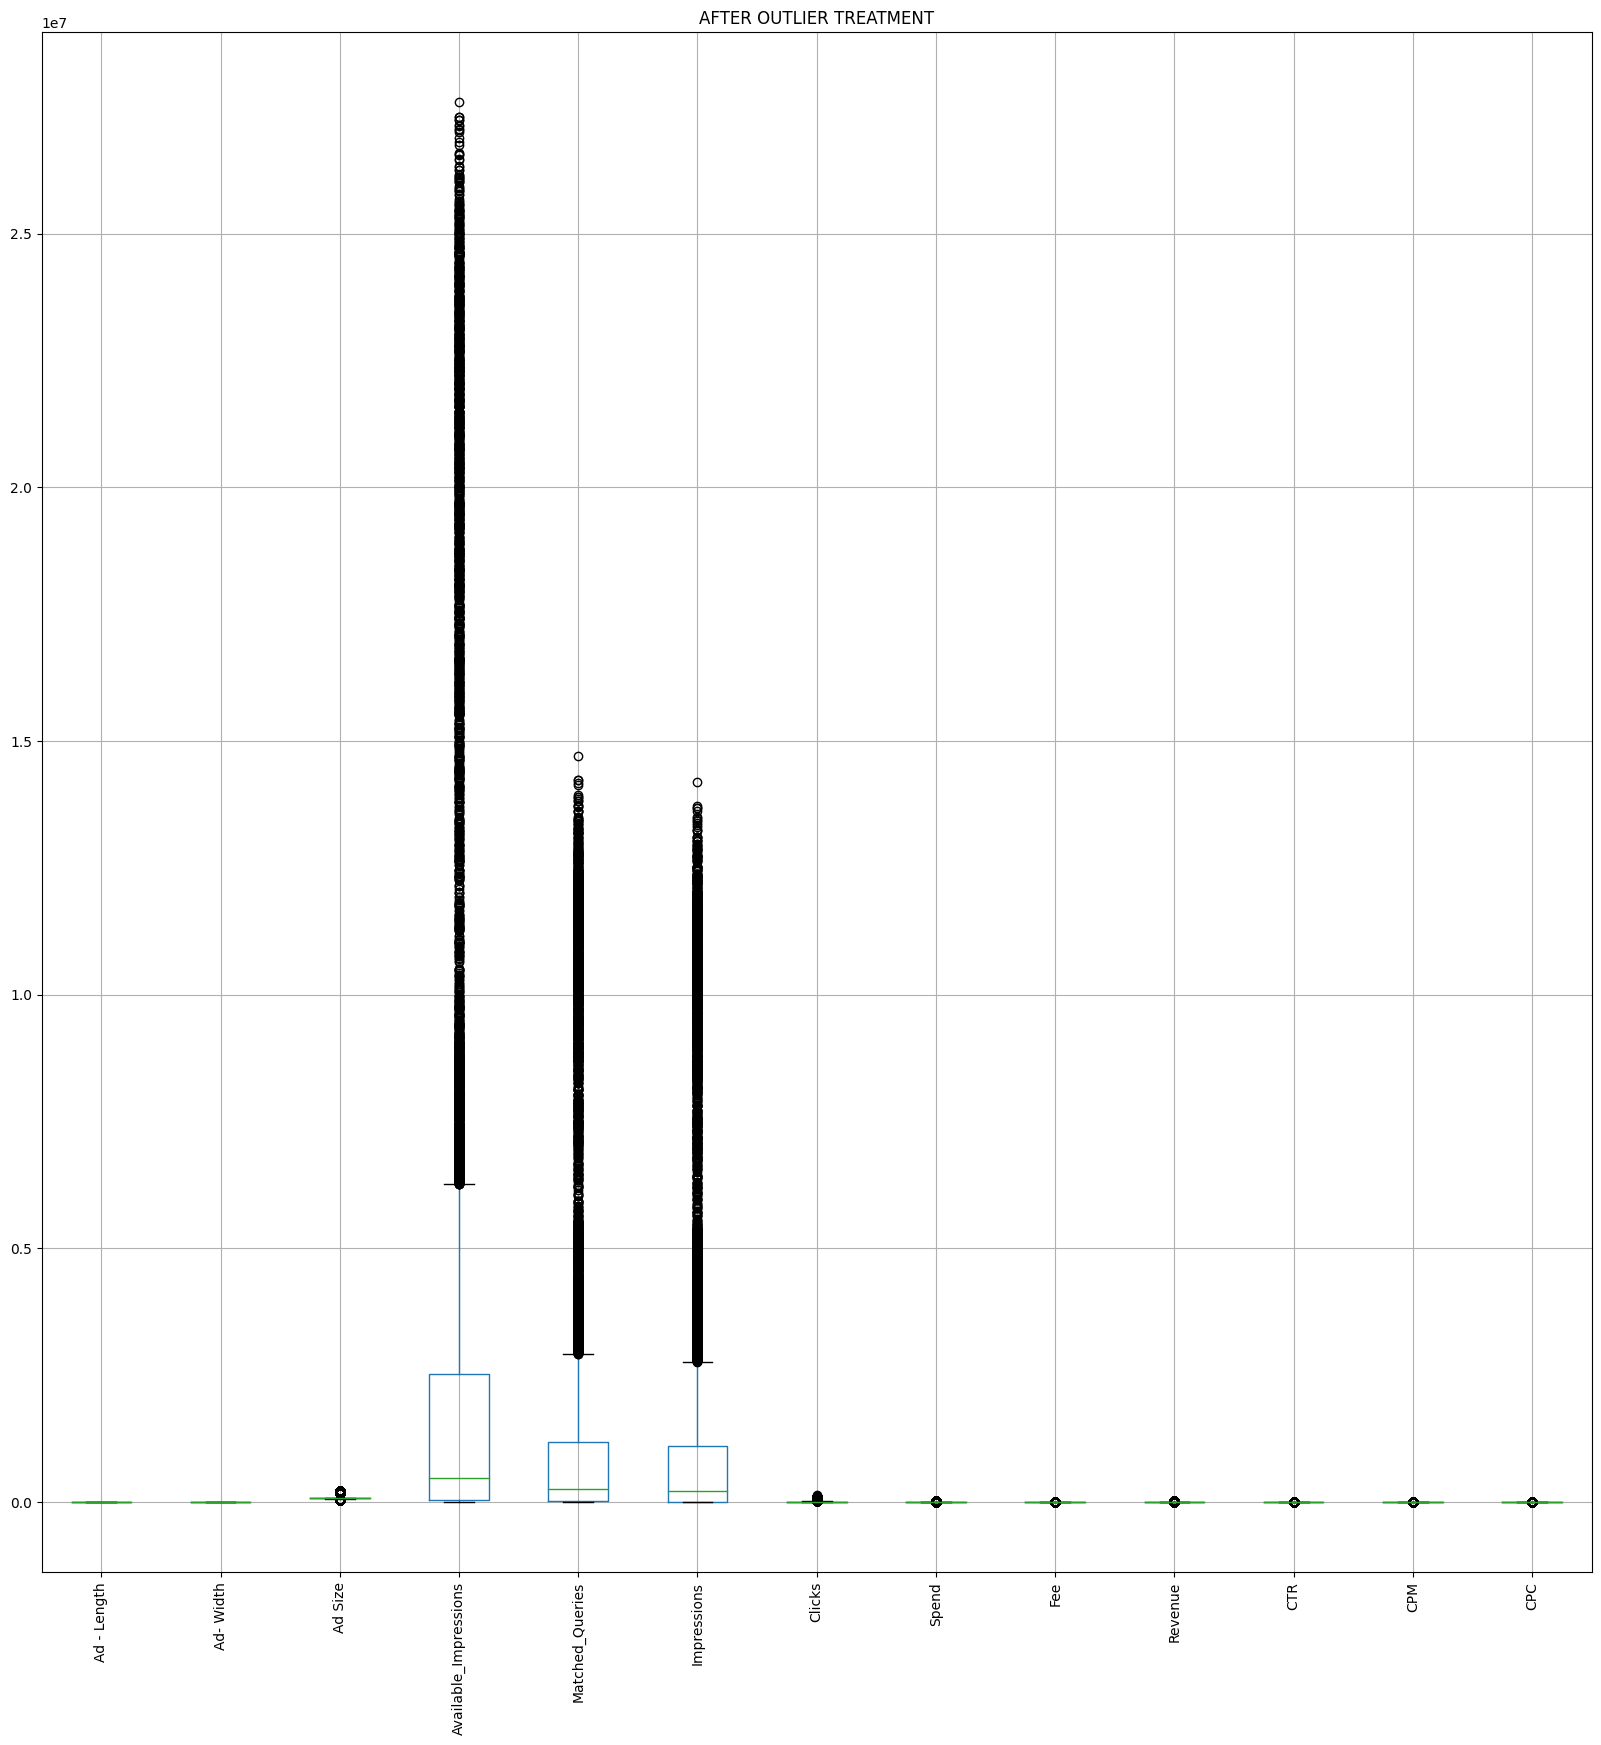

In [ ]:
df_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.title ('AFTER OUTLIER TREATMENT')
plt.show()

# Z SCORE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df_num.shape

(23066, 13)

In [ ]:
X = StandardScaler()
scaled_df = pd.DataFrame(X.fit_transform(df_num.iloc[:,1:13]),columns=df_num.columns[1:])
scaled_df

,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.432797,-0.352218,-0.512407,-0.515248,-0.510918,-0.615311,-0.665372,0.465447,-0.619693,-0.874550,-0.927054,-0.986477
1,-0.432797,-0.352218,-0.512413,-0.515264,-0.510933,-0.615311,-0.665372,0.465447,-0.619693,-0.870232,-0.927054,-0.986477
2,-0.432797,-0.352218,-0.512213,-0.515235,-0.510905,-0.615311,-0.665372,0.465447,-0.619693,-0.877790,-0.927054,-0.986477
3,-0.432797,-0.352218,-0.512276,-0.515179,-0.510847,-0.615311,-0.665372,0.465447,-0.619693,-0.886427,-0.927054,-0.986477
4,-0.432797,-0.352218,-0.512531,-0.515281,-0.510951,-0.615311,-0.665372,0.465447,-0.619693,-0.863753,-0.927054,-0.986477
...,...,...,...,...,...,...,...,...,...,...,...,...
23061,-0.186599,1.939086,-0.512788,-0.515377,-0.511050,-0.615311,-0.665355,0.465447,-0.619678,9.888974,6.801297,-0.781356
23062,-0.186599,1.939086,-0.512787,-0.515376,-0.511050,-0.615311,-0.665362,0.465447,-0.619684,4.490477,1.281047,-0.869265
23063,-0.186599,1.939086,-0.512788,-0.515377,-0.511050,-0.615311,-0.665360,0.465447,-0.619682,9.888974,4.593197,-0.839962
23064,1.290590,-0.400970,-0.512787,-0.515377,-0.511050,-0.615311,-0.665355,0.465447,-0.619678,9.888974,6.801297,-0.781356


In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [ ]:
link_method = linkage(scaled_df.iloc[:,1:12], method = 'ward')

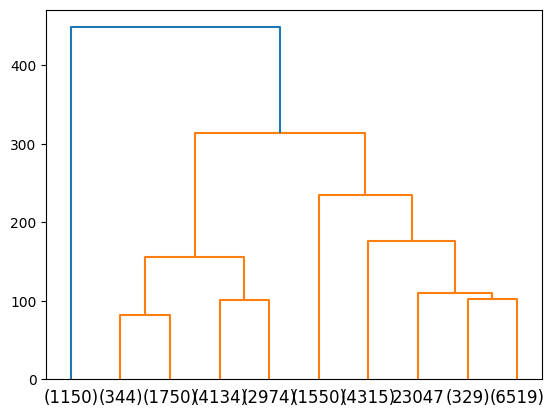

In [ ]:
dend = dendrogram (link_method, truncate_mode = 'lastp', p = 10 )

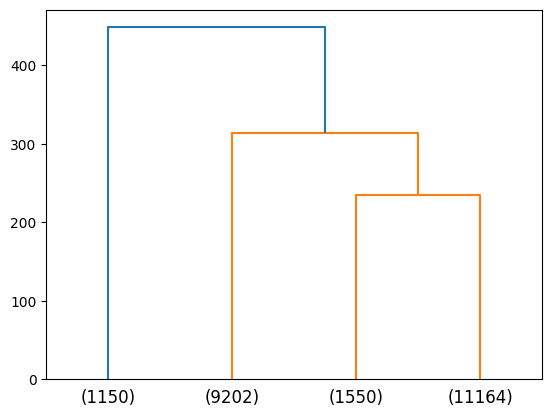

In [ ]:
dend = dendrogram (link_method, truncate_mode = 'lastp', p = 4 )

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
ag_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
Cluster_agglo=ag_cluster.fit_predict(scaled_df.iloc[:,1:12])
print(Cluster_agglo)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[0 0 0 ... 0 0 0]


In [ ]:
df["Agglo_CLusters"]=Cluster_agglo

In [ ]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Agglo_CLusters
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.31,0.0,0.0,0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.35,0.0,0.0,0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.28,0.0,0.0,0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.20,0.0,0.0,0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.41,0.0,0.0,0


In [ ]:
agglo_data=df.groupby('Agglo_CLusters').mean()
agglo_data['Freq']=df.Agglo_CLusters.value_counts().sort_index()
agglo_data

<ipython-input-46-200278fc261f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agglo_data=df.groupby('Agglo_CLusters').mean()


,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Freq
Agglo_CLusters,,,,,,,,,,,,,,
0,385.14925,337.876594,96661.57662,2.432460e+06,1.295320e+06,1.241732e+06,10680.370436,2707.092715,0.335121,1924.584507,8.40056,8.360727,0.33613,23062
1,510.00000,450.000000,198000.00000,6.201050e+04,4.036650e+04,3.558200e+04,4.500000,27.185000,0.350000,17.670000,0.01500,0.755000,5.88500,2
2,720.00000,300.000000,216000.00000,8.000000e+00,2.000000e+00,1.000000e+00,2.000000,0.150000,0.350000,0.097500,200.00000,150.000000,0.08000,1
3,120.00000,600.000000,72000.00000,2.000000e+00,2.000000e+00,2.000000e+00,1.000000,1.430000,0.350000,0.929500,50.00000,715.000000,1.43000,1


# ELBOW PLOT

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wss =[] 

In [ ]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
wss

[276791.9999999997,
 168176.47961531056,
 110729.78204348359,
 74398.17483578404,
 53840.288925652254,
 42117.903112077576,
 36837.92621985178,
 33263.726296593784,
 30188.65122766242,
 27892.05926886671]

In [ ]:
a=[1,2,3,4,5,6,7,8,9,10]

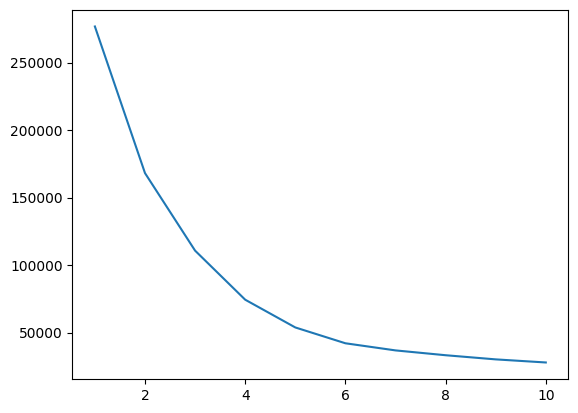

In [ ]:
plt.plot(range(1,11), wss)

# SILHOUTTE SCORE

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
silhouette_score(scaled_df,labels,random_state=1)

0.4265387058531228

In [ ]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
silhouette_score(scaled_df,labels,random_state=1)

0.4897115353973208

In [ ]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
silhouette_score(scaled_df,labels,random_state=1)

0.5287346092885673

In [ ]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
silhouette_score(scaled_df,labels,random_state=1)

0.5436139998407944

In [ ]:
k_means = KMeans(n_clusters = 7,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
silhouette_score(scaled_df,labels,random_state=1)

0.5038572616079223

In [ ]:
k_means = KMeans(n_clusters = 8,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
silhouette_score(scaled_df,labels,random_state=1)

0.4518469656196147

In [ ]:
k_means = KMeans(n_clusters = 9,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
silhouette_score(scaled_df,labels,random_state=1)

0.45221307159676855

In [ ]:
k_means = KMeans(n_clusters = 10,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
silhouette_score(scaled_df,labels,random_state=1)

0.4539191483186223

# PROFILE

In [ ]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
clusters = fcluster(link_method,6,criterion='maxclust')
clusters

array([4, 4, 4, ..., 6, 5, 6], dtype=int32)

In [ ]:
df['clusters'] = clusters

In [ ]:
df.shape

(23066, 20)

In [ ]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.31,0.0,0.0,3
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.35,0.0,0.0,3
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.28,0.0,0.0,3
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.20,0.0,0.0,3
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.41,0.0,0.0,3


In [ ]:
df.clusters.value_counts().sort_index()

1    1253
2    1510
3    1752
4    6864
5    6707
6    4980
Name: clusters, dtype: int64

In [ ]:
aggdata= df.iloc[:,1:19].groupby(df['clusters']).mean()
aggdata['Freq']= df.clusters.value_counts().sort_index()
aggdata

<ipython-input-123-967ae7aa83cb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggdata= df.iloc[:,1:19].groupby(df['clusters']).mean()


,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Freq
clusters,,,,,,,,,,,,,,
1,141.835595,572.067039,75715.881883,8.787287e+05,6.207391e+05,5.238120e+05,71556.263368,7645.819425,0.278819,5532.487799,13.774270,15.215491,0.110383,1253
2,679.560265,118.556291,70230.834437,1.797533e+07,9.595386e+06,9.239259e+06,17537.707285,15474.630285,0.238715,11843.556259,0.188252,1.708675,0.916934,1510
3,320.673516,252.905251,78264.794521,6.613046e+06,3.697269e+06,3.616010e+06,8535.450342,4875.173664,0.318219,3331.590484,0.235656,1.371872,0.598196,1752
4,420.155594,148.331876,53891.870629,2.082522e+06,1.025575e+06,9.856740e+05,3478.984848,1774.309592,0.346841,1165.813151,0.385980,1.785280,0.573515,6864
5,146.660504,556.791412,73480.095423,4.711609e+04,2.900135e+04,2.151616e+04,2981.553004,322.788071,0.349663,211.021298,15.874635,14.630951,0.101810,6707
6,652.790361,341.857430,206648.192771,3.327757e+05,1.795705e+05,1.574390e+05,14324.827711,1325.104373,0.348735,866.349248,13.435120,11.897394,0.115408,4980


In [ ]:
df.groupby(['Spend','Device Type']).sum()['Clicks'].plot(kind='bar',figsize=(12,7))

# PCA

In [21]:
data= pd.read_excel('/content/PCA India Data_Census.xlsx')

In [ ]:
data.shape

(640, 61)

In [ ]:
data.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [ ]:
data_cat = data.select_dtypes(include = ['object'])

In [ ]:
np.round(data.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.11,9.43,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.50,184.90,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.87,48135.41,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.58,73384.51,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.08,113600.72,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.10,11500.91,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.30,11326.29,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.95,14426.37,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.39,21727.89,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.81,9912.67,0.0,293.75,2333.5,7658.00,96785.0


In [ ]:
data.shape

(640, 61)

In [ ]:
data.duplicated().value_counts()

False    640
dtype: int64

In [ ]:
data.isnull().sum().sum()

0

# EDA

In [24]:
data['GenderRatio']= data['TOT_F'] / data['TOT_M']

In [7]:
data.groupby(['State']).mean()['GenderRatio'].sort_values(ascending=False)

<ipython-input-7-1046b58456cd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['State']).mean()['GenderRatio'].sort_values(ascending=False)


State
Andhra Pradesh              1.895093
Chhattisgarh                1.869501
Tamil Nadu                  1.861113
Odisha                      1.830305
Arunachal Pradesh           1.757634
Maharashtra                 1.743672
Nagaland                    1.717555
Kerala                      1.700197
Puducherry                  1.673442
Uttarakhand                 1.650205
Himachal Pradesh            1.616170
Goa                         1.613884
Tripura                     1.608367
Madhya Pradesh              1.587745
Andaman & Nicobar Island    1.581870
Mizoram                     1.581292
Karnataka                   1.578222
Manipur                     1.563842
Dadara & Nagar Havelli      1.551275
West Bengal                 1.541931
Sikkim                      1.524218
Gujarat                     1.513508
Jharkhand                   1.481463
Rajasthan                   1.470241
Assam                       1.460374
Chandigarh                  1.428496
Daman & Diu                 1.42

In [25]:
data['GR_06']= data['F_06'] / data['M_06']

In [9]:
data.groupby(['State']).mean()['GR_06'].sort_values(ascending=False)

<ipython-input-9-0ae1799e8a99>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['State']).mean()['GR_06'].sort_values(ascending=False)


State
Arunachal Pradesh           1.077129
Dadara & Nagar Havelli      1.041812
Mizoram                     1.029533
Meghalaya                   1.023831
Jharkhand                   1.018963
Bihar                       1.004937
Chhattisgarh                1.004087
Goa                         1.002041
Maharashtra                 0.996049
Puducherry                  0.995456
West Bengal                 0.989665
Assam                       0.989520
Uttar Pradesh               0.984971
Karnataka                   0.977602
Kerala                      0.977270
Daman & Diu                 0.976702
Nagaland                    0.976432
Manipur                     0.974591
Odisha                      0.974122
Andhra Pradesh              0.969294
Sikkim                      0.969226
Madhya Pradesh              0.962490
Gujarat                     0.952710
Tamil Nadu                  0.951862
Tripura                     0.947326
Andaman & Nicobar Island    0.944465
Rajasthan                   0.94

In [26]:
data['GR_LIT']= data['F_LIT'] / data['M_LIT']

In [11]:
data.groupby(['State']).mean()['GR_LIT'].sort_values(ascending=False)

<ipython-input-11-685f4da193d6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['State']).mean()['GR_LIT'].sort_values(ascending=False)


State
Kerala                      1.665331
Mizoram                     1.565487
Nagaland                    1.465217
Goa                         1.413201
Tripura                     1.406433
Puducherry                  1.385163
Maharashtra                 1.365704
Andaman & Nicobar Island    1.308977
Arunachal Pradesh           1.307364
Meghalaya                   1.303851
Uttarakhand                 1.302127
Chandigarh                  1.294647
Himachal Pradesh            1.282816
Tamil Nadu                  1.279773
Sikkim                      1.238620
Manipur                     1.220003
Odisha                      1.177696
Daman & Diu                 1.153941
West Bengal                 1.146578
Chhattisgarh                1.144733
NCT of Delhi                1.140560
Andhra Pradesh              1.120612
Gujarat                     1.119928
Assam                       1.117179
Karnataka                   1.094448
Punjab                      1.077167
Lakshadweep                 1.06

In [27]:
data['GR_ILL']= data['F_ILL'] / data['M_ILL']

In [13]:
data.groupby(['State']).mean()['GR_ILL'].sort_values(ascending=False)

<ipython-input-13-8fc0c3efe00c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['State']).mean()['GR_ILL'].sort_values(ascending=False)


State
Tamil Nadu                  4.271965
Andhra Pradesh              4.051520
Chhattisgarh                3.705274
Odisha                      3.573074
Maharashtra                 3.102779
Karnataka                   3.000637
Dadara & Nagar Havelli      2.964573
Puducherry                  2.957248
Himachal Pradesh            2.880461
Madhya Pradesh              2.852555
Rajasthan                   2.812395
Daman & Diu                 2.767135
Uttarakhand                 2.716193
Gujarat                     2.698594
Andaman & Nicobar Island    2.695249
Arunachal Pradesh           2.643311
Goa                         2.633756
West Bengal                 2.627779
Manipur                     2.594775
Sikkim                      2.572014
Nagaland                    2.508156
Jharkhand                   2.488781
Tripura                     2.464976
Assam                       2.307773
Haryana                     2.301337
Jammu & Kashmir             2.150122
Uttar Pradesh               2.13

In [28]:
data['TOT_WORK_GR']= data['TOT_WORK_F'] / data['TOT_WORK_M']

In [15]:
data.groupby(['State']).mean()['TOT_WORK_GR'].sort_values(ascending=False)

<ipython-input-15-f263e1d13672>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['State']).mean()['TOT_WORK_GR'].sort_values(ascending=False)


State
Arunachal Pradesh           2.800141
Nagaland                    2.447661
Uttarakhand                 2.041131
Chhattisgarh                2.002111
Manipur                     1.758061
Andhra Pradesh              1.750836
Mizoram                     1.743010
Maharashtra                 1.671265
Himachal Pradesh            1.616604
Odisha                      1.538105
Madhya Pradesh              1.527034
Tamil Nadu                  1.513244
Sikkim                      1.487855
Meghalaya                   1.470992
Jharkhand                   1.443190
Rajasthan                   1.407223
Dadara & Nagar Havelli      1.404079
Tripura                     1.185948
Karnataka                   1.179587
Andaman & Nicobar Island    1.025632
Bihar                       1.011342
Assam                       1.008075
Gujarat                     0.997892
Jammu & Kashmir             0.922714
West Bengal                 0.864583
Uttar Pradesh               0.822479
Kerala                      0.81

In [29]:
data['MAINWORK_GR']= data['MAINWORK_F'] / data['MAINWORK_M']

In [17]:
data.groupby(['State']).mean()['MAINWORK_GR'].sort_values(ascending=False)

<ipython-input-17-bb031e53f24e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['State']).mean()['MAINWORK_GR'].sort_values(ascending=False)


State
Nagaland                    3.054592
Arunachal Pradesh           2.965201
Uttarakhand                 1.914651
Mizoram                     1.717812
Manipur                     1.686487
Chhattisgarh                1.652799
Andhra Pradesh              1.597140
Maharashtra                 1.585997
Meghalaya                   1.490595
Tamil Nadu                  1.394043
Sikkim                      1.386571
Madhya Pradesh              1.327391
Himachal Pradesh            1.265856
Odisha                      1.209891
Dadara & Nagar Havelli      1.149853
Jharkhand                   1.126577
Andaman & Nicobar Island    1.092796
Karnataka                   1.056806
Rajasthan                   1.035569
Tripura                     0.988518
Assam                       0.866726
Gujarat                     0.812619
Bihar                       0.801638
Chandigarh                  0.743836
Goa                         0.735376
West Bengal                 0.717425
Puducherry                  0.70

# OUTLIERS


In [30]:
data_num = data.copy()

In [31]:
data_num.drop(['State Code'], axis=1, inplace= True)
data_num.drop(['Dist.Code'], axis=1, inplace= True)
data_num.drop(['Area Name'], axis=1, inplace= True)
data_num.drop(['State'], axis=1, inplace= True)
data_num.drop(['MAINWORK_GR'], axis=1, inplace= True)
data_num.drop(['TOT_WORK_GR'], axis=1, inplace= True)
data_num.drop(['GR_ILL'], axis=1, inplace= True)
data_num.drop(['GR_LIT'], axis=1, inplace= True)
data_num.drop(['GR_06'], axis=1, inplace= True)
data_num.drop(['GenderRatio'], axis=1, inplace= True)

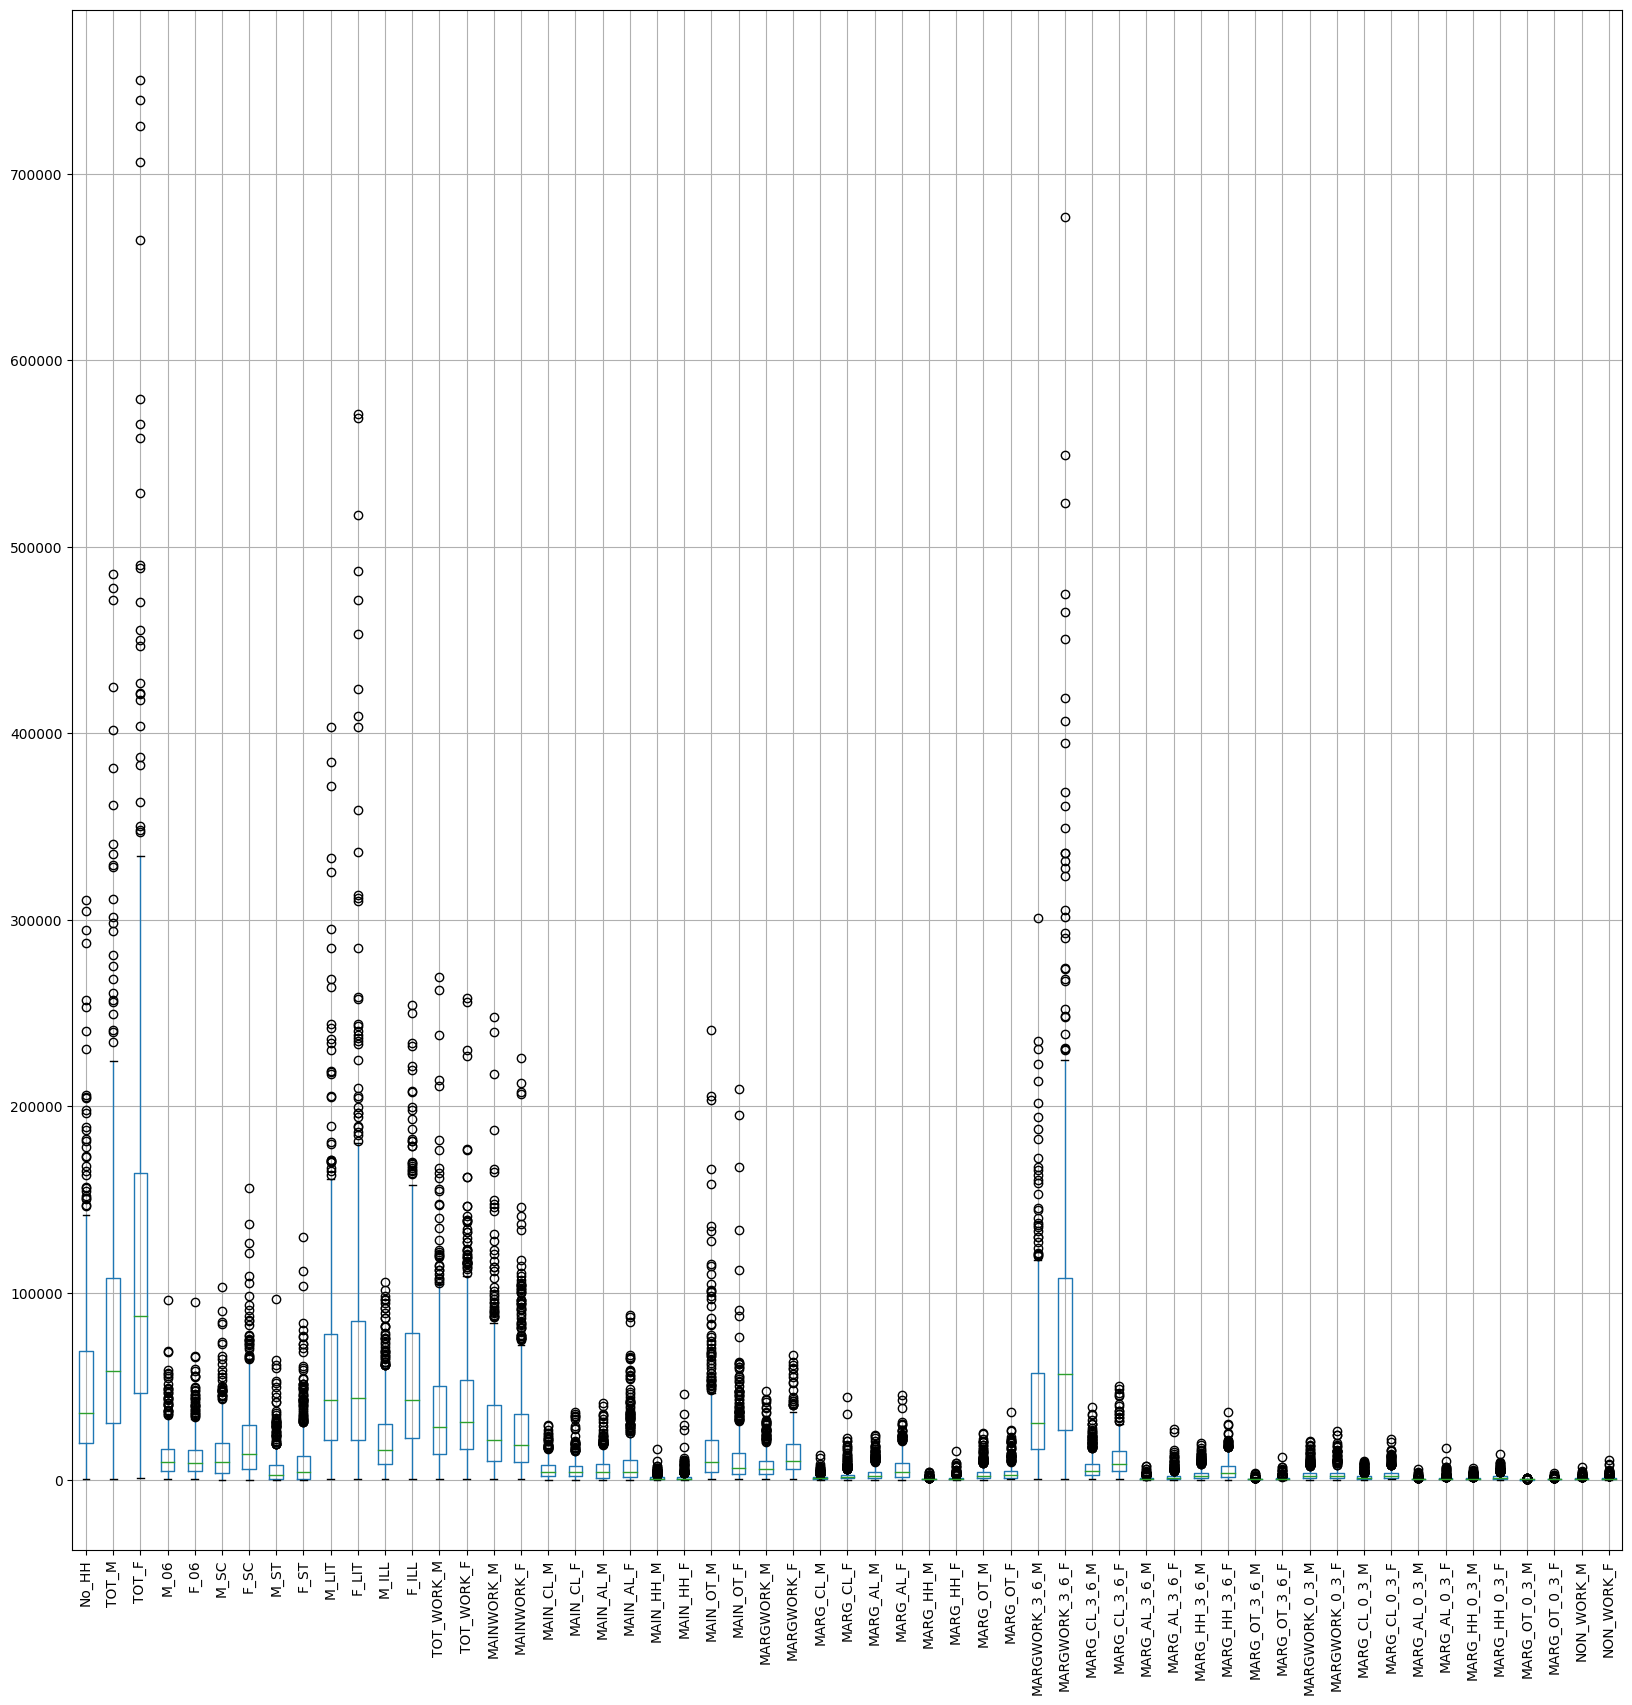

In [ ]:
data_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

# Z-SCORE

In [32]:
from scipy.stats import zscore
data_scaled= data_num.apply(zscore)
data_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


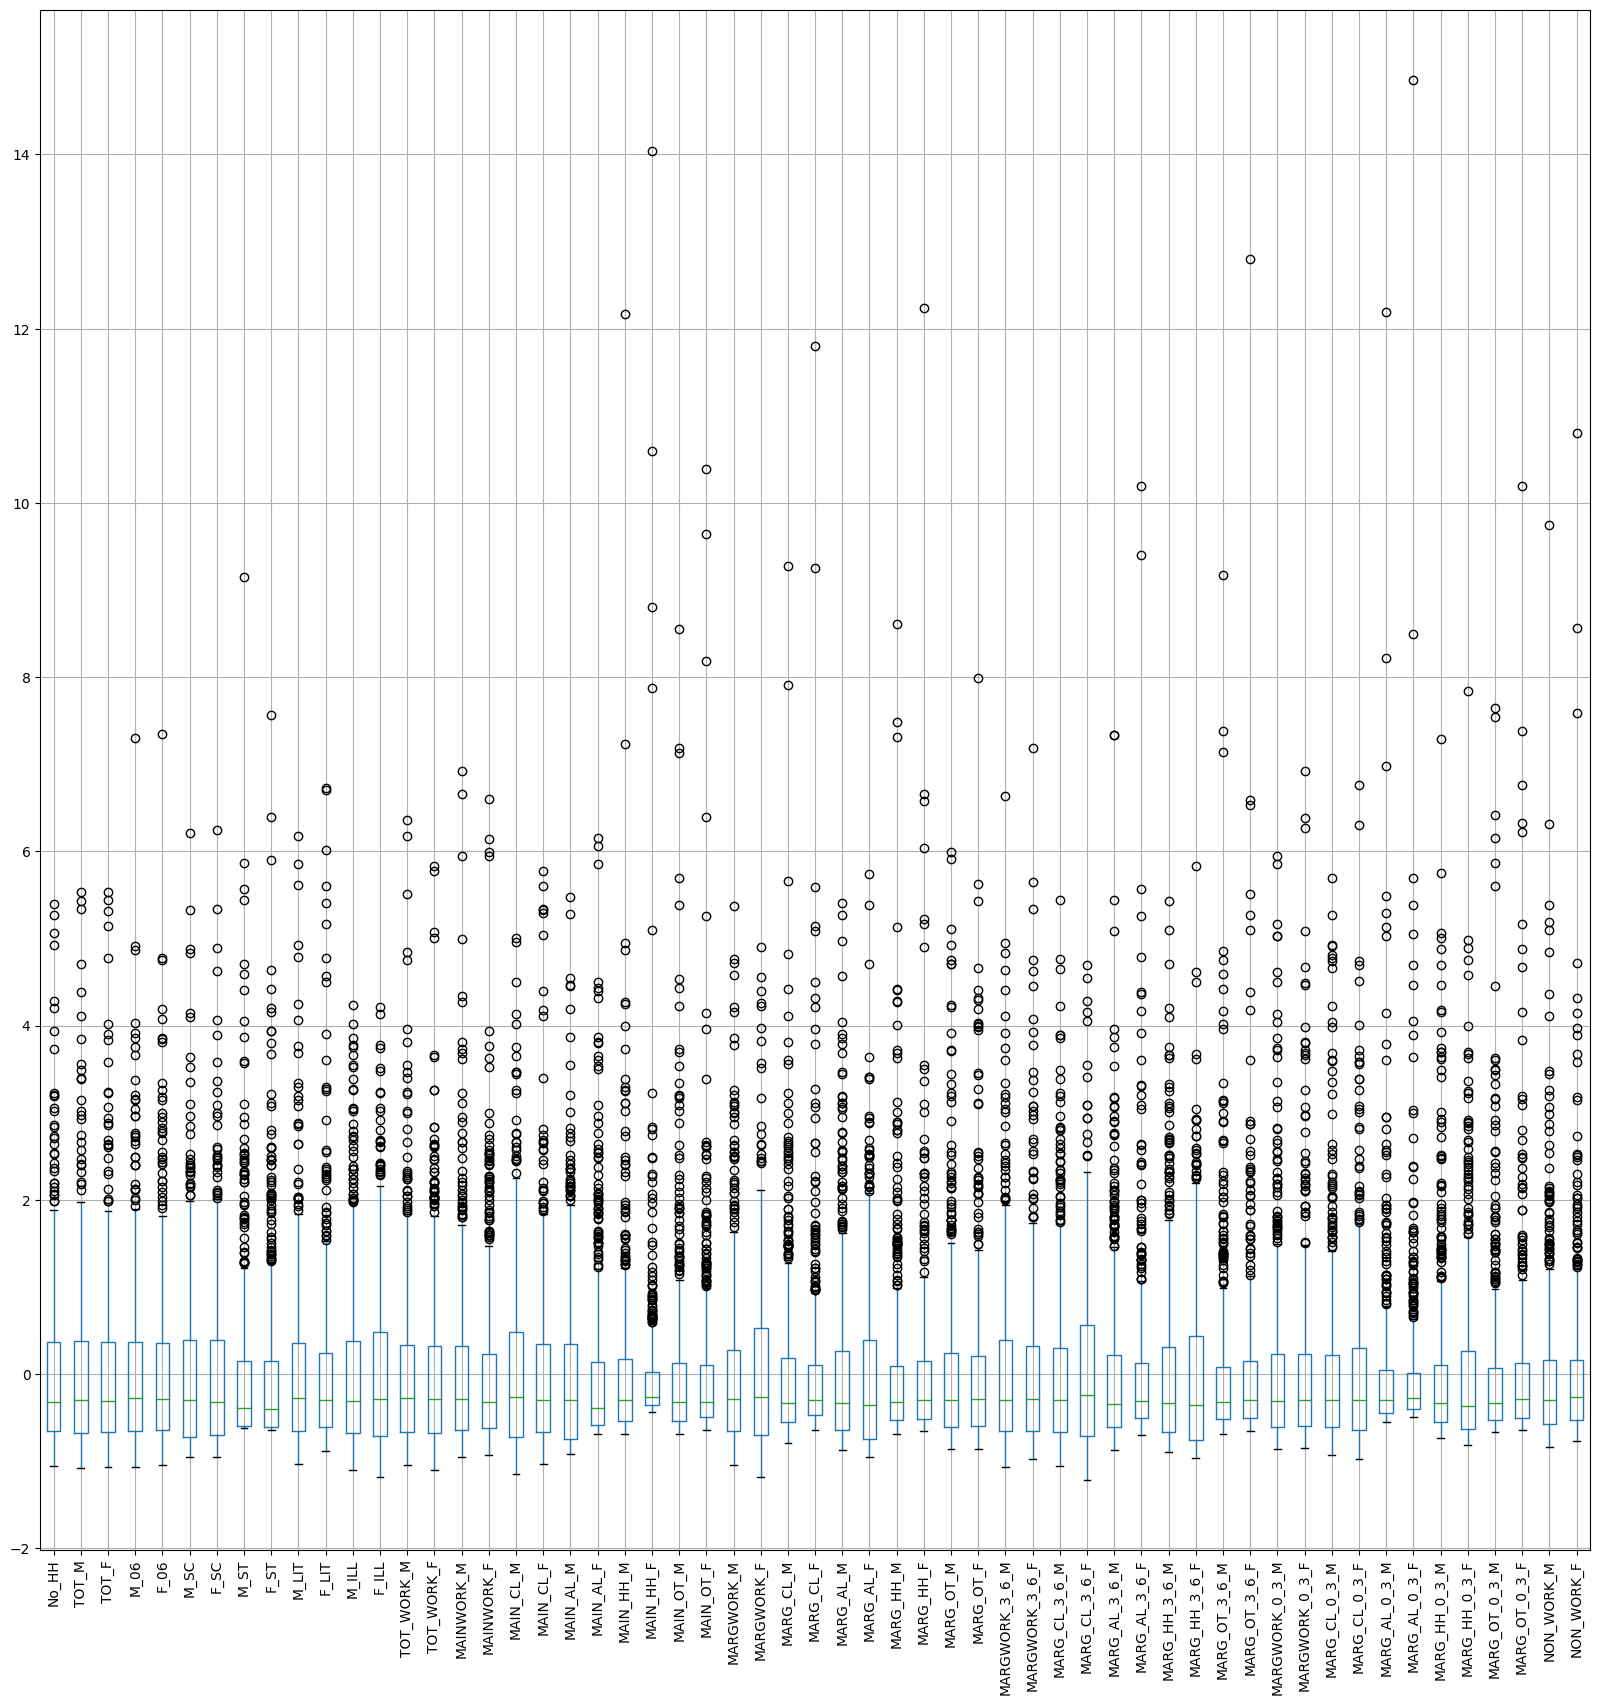

In [ ]:
data_scaled.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [ ]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No_HH           640 non-null    float64
 1   TOT_M           640 non-null    float64
 2   TOT_F           640 non-null    float64
 3   M_06            640 non-null    float64
 4   F_06            640 non-null    float64
 5   M_SC            640 non-null    float64
 6   F_SC            640 non-null    float64
 7   M_ST            640 non-null    float64
 8   F_ST            640 non-null    float64
 9   M_LIT           640 non-null    float64
 10  F_LIT           640 non-null    float64
 11  M_ILL           640 non-null    float64
 12  F_ILL           640 non-null    float64
 13  TOT_WORK_M      640 non-null    float64
 14  TOT_WORK_F      640 non-null    float64
 15  MAINWORK_M      640 non-null    float64
 16  MAINWORK_F      640 non-null    float64
 17  MAIN_CL_M       640 non-null    flo

# STATISTICAL TEST BEFORE PCA

In [ ]:
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity 
chi_square_value, p_value=calculate_bartlett_sphericity(data_scaled)
p_value

0.0

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data_scaled)
kmo_model

0.8039889932781807

# PCA

In [ ]:
data_scaled.shape

(640, 57)

In [ ]:
from sklearn.decomposition import PCA
pca_full = PCA(n_components=57, random_state=123)
data_pca_full = pca_full.fit_transform(data_scaled)
data_pca_full.transpose()

array([[-4.61726348e+00, -4.77166187e+00, -5.96483558e+00, ...,
        -6.29462500e+00, -6.22319199e+00, -5.89623627e+00],
       [ 1.38115857e-01, -1.05865351e-01, -2.94346892e-01, ...,
        -6.38126644e-01, -6.72319673e-01, -9.37169526e-01],
       [ 3.28544953e-01,  2.44448976e-01,  3.67393453e-01, ...,
         1.07482817e-01,  2.71325467e-01,  3.49218364e-01],
       ...,
       [ 4.77564322e-16,  1.07290757e-15, -8.27688873e-16, ...,
        -2.78958090e-16, -9.20474155e-16,  1.61640294e-16],
       [ 5.32735052e-16,  7.91273301e-16,  4.51322709e-18, ...,
        -2.63468190e-16,  7.05034841e-17, -2.21034167e-16],
       [ 1.87522735e-16, -3.50751930e-17, -1.75309017e-15, ...,
         4.82581504e-16,  6.58197331e-16, -1.39693682e-17]])

In [33]:
cov_matrix = np.cov(data_scaled.T)

In [38]:
print(cov_matrix)

[[1.00156495 0.91760364 0.97210871 ... 0.53769433 0.76357722 0.73684378]
 [0.91760364 1.00156495 0.98417823 ... 0.5891007  0.84621844 0.71718181]
 [0.97210871 0.98417823 1.00156495 ... 0.572748   0.82894851 0.74775097]
 ...
 [0.53769433 0.5891007  0.572748   ... 1.00156495 0.61052325 0.52191235]
 [0.76357722 0.84621844 0.82894851 ... 0.61052325 1.00156495 0.88228018]
 [0.73684378 0.71718181 0.74775097 ... 0.52191235 0.88228018 1.00156495]]


In [35]:
from numpy.linalg import eig
eigenvalues, eigenvectors = eig(cov_matrix)

In [36]:
eigenvalues

array([ 3.18135647e+01+0.00000000e+00j,  7.86942415e+00+0.00000000e+00j,
        4.15340812e+00+0.00000000e+00j,  3.66879058e+00+0.00000000e+00j,
        2.20652588e+00+0.00000000e+00j,  1.93827502e+00+0.00000000e+00j,
        1.17617374e+00+0.00000000e+00j,  7.51159086e-01+0.00000000e+00j,
        6.17053743e-01+0.00000000e+00j,  5.28300887e-01+0.00000000e+00j,
        4.29831189e-01+0.00000000e+00j,  3.53440201e-01+0.00000000e+00j,
        2.96163013e-01+0.00000000e+00j,  2.81275560e-01+0.00000000e+00j,
        1.92158325e-01+0.00000000e+00j,  1.36267920e-01+0.00000000e+00j,
        1.13389199e-01+0.00000000e+00j,  1.06303946e-01+0.00000000e+00j,
        9.72885376e-02+0.00000000e+00j,  8.01062194e-02+0.00000000e+00j,
        5.76089954e-02+0.00000000e+00j,  4.43955966e-02+0.00000000e+00j,
        3.78910846e-02+0.00000000e+00j,  2.96360194e-02+0.00000000e+00j,
        2.70797618e-02+0.00000000e+00j,  2.34458139e-02+0.00000000e+00j,
        1.45111511e-02+0.00000000e+00j,  7.13559124

In [37]:
eigenvectors

array([[-1.56020579e-01+0.j,  1.26346525e-01+0.j, -2.69025037e-03+0.j,
        ...,  8.59813362e-14+0.j, -1.76746604e-13+0.j,
         1.08099785e-13+0.j],
       [-1.67117635e-01+0.j,  8.96765481e-02+0.j,  5.66976191e-02+0.j,
        ...,  5.28021877e-02+0.j, -1.10854618e-01+0.j,
         2.72794503e-02+0.j],
       [-1.65553179e-01+0.j,  1.04912371e-01+0.j,  3.87494746e-02+0.j,
        ...,  2.04945480e-01+0.j, -2.01549789e-01+0.j,
         1.06371673e-01+0.j],
       ...,
       [-1.32192245e-01+0.j, -5.08133220e-02+0.j, -7.87198691e-02+0.j,
        ...,  5.02777797e-03+0.j,  2.99863496e-03+0.j,
         5.44284135e-05+0.j],
       [-1.50375578e-01+0.j,  6.53645529e-02+0.j,  1.11827318e-01+0.j,
        ..., -3.00935627e-02+0.j, -1.48422322e-02+0.j,
         9.62462558e-02+0.j],
       [-1.31066203e-01+0.j,  7.38474208e-02+0.j,  1.02552501e-01+0.j,
        ...,  2.84776742e-02+0.j, -5.59381919e-02+0.j,
         1.00243536e-01+0.j]])

In [ ]:
pca_full.components_

array([[ 0.15602058,  0.16711763,  0.16555318, ...,  0.13219224,
         0.15037558,  0.1310662 ],
       [-0.12634653, -0.08967655, -0.10491237, ...,  0.05081332,
        -0.06536455, -0.07384742],
       [-0.00269025,  0.05669762,  0.03874947, ..., -0.07871987,
         0.11182732,  0.1025525 ],
       ...,
       [ 0.        ,  0.37643683,  0.15058437, ...,  0.03363703,
        -0.07959556, -0.02552519],
       [-0.        ,  0.2448199 ,  0.09383958, ..., -0.02638552,
        -0.01672564,  0.03567243],
       [-0.        , -0.09325898, -0.0110033 , ...,  0.01165739,
        -0.01279215, -0.00377366]])

In [ ]:
pca_full.components_.shape

(57, 57)

In [ ]:
np.round(pca_full.explained_variance_ratio_,2)

array([0.56, 0.14, 0.07, 0.06, 0.04, 0.03, 0.02, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  ])

In [ ]:
pca_full.explained_variance_ratio_.cumsum()

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687,
       0.96607599, 0.97226701, 0.97745473, 0.98238168, 0.98574761,
       0.98813454, 0.99012071, 0.99198278, 0.99368693, 0.99509011,
       0.99609921, 0.99687687, 0.99754058, 0.9980597 , 0.99853404,
       0.99894473, 0.99919891, 0.99939134, 0.9995545 , 0.99969701,
       0.99983525, 0.99992329, 0.9999688 , 0.9999875 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [ ]:
var_exp_full = pca_full.explained_variance_ratio_

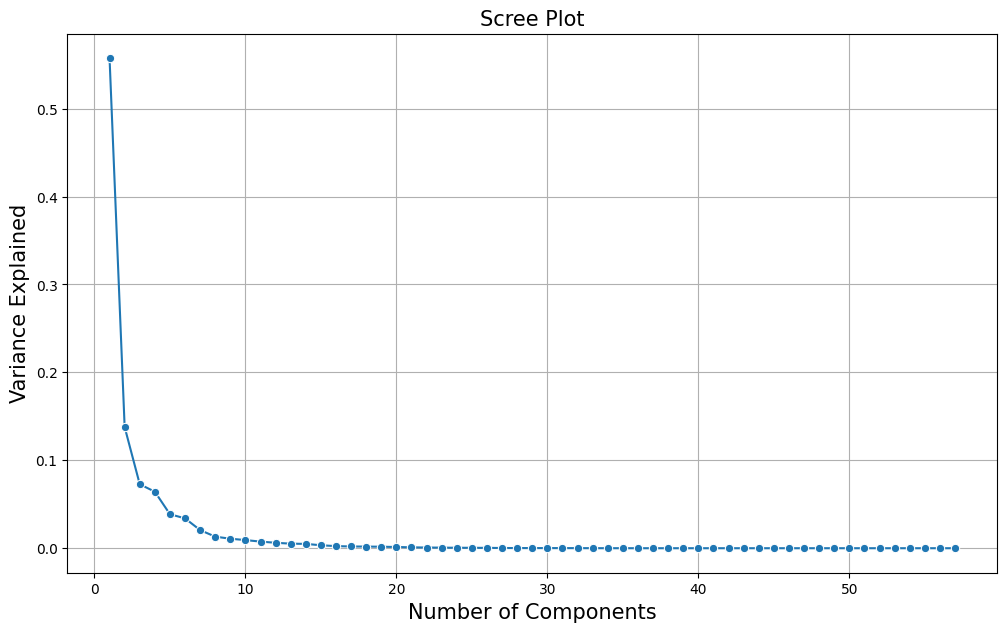

In [ ]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp_full,x=range(1,len(var_exp_full)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

# PCA (6)

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6, random_state=123)
df_pca = pca.fit_transform(data_scaled)
df_pca.transpose()

array([[-4.61726348, -4.77166187, -5.96483558, ..., -6.294625  ,
        -6.22319199, -5.89623627],
       [ 0.13811585, -0.10586536, -0.29434689, ..., -0.63812665,
        -0.67231967, -0.93716953],
       [ 0.32854489,  0.24444895,  0.36739354, ...,  0.10748279,
         0.27132545,  0.34921832],
       [ 1.54369714,  1.96321495,  0.61954271, ...,  1.36818692,
         1.14349288,  1.114861  ],
       [ 0.35373623, -0.15388429,  0.47819913, ...,  0.15374528,
         0.06043998,  0.14910357],
       [-0.42094803,  0.41730835,  0.27658052, ...,  0.14114473,
        -0.11568247, -0.15454413]])

In [ ]:
pca.components_

array([[ 1.56020579e-01,  1.67117635e-01,  1.65553179e-01,
         1.62192948e-01,  1.62566396e-01,  1.51357849e-01,
         1.51566500e-01,  2.72341946e-02,  2.81833150e-02,
         1.61992837e-01,  1.46872680e-01,  1.61749445e-01,
         1.65248187e-01,  1.59871988e-01,  1.45935804e-01,
         1.46200730e-01,  1.23970284e-01,  1.03127159e-01,
         7.45397856e-02,  1.13355712e-01,  7.38821590e-02,
         1.31572584e-01,  8.33826397e-02,  1.23526242e-01,
         1.11021264e-01,  1.64615479e-01,  1.55395618e-01,
         8.23885414e-02,  4.91953957e-02,  1.28598563e-01,
         1.14305073e-01,  1.40853227e-01,  1.27669598e-01,
         1.55262872e-01,  1.47286584e-01,  1.64971950e-01,
         1.61253433e-01,  1.65501611e-01,  1.55647049e-01,
         9.30142064e-02,  5.15358640e-02,  1.28576116e-01,
         1.10645843e-01,  1.39592763e-01,  1.24545909e-01,
         1.54293786e-01,  1.46285654e-01,  1.50125706e-01,
         1.40157047e-01,  5.25417829e-02,  4.17859530e-0

In [ ]:
var_exp = pca.explained_variance_ratio_

In [ ]:
pca.explained_variance_ratio_

array([0.55726063, 0.13784435, 0.07275295, 0.06426418, 0.03865049,
       0.03395169])

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 ])

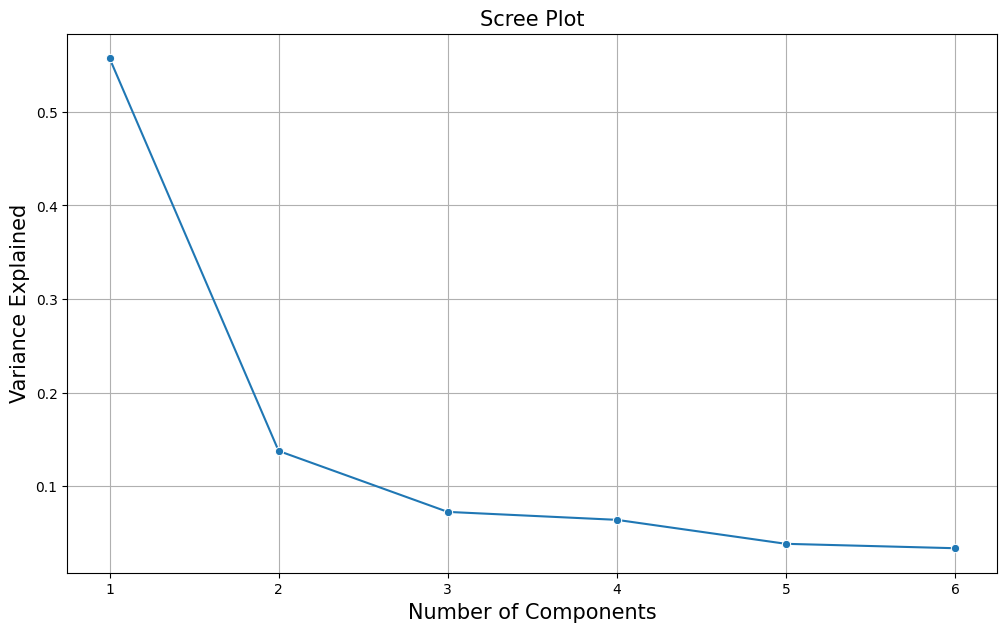

In [ ]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [ ]:
data_pca_loading = pd.DataFrame(pca.components_,columns=list(data_scaled))
data_pca_loading.shape

(6, 57)

In [ ]:
data_pca_loading

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,0.156021,0.167118,0.165553,0.162193,0.162566,0.151358,0.151567,0.027234,0.028183,0.161993,...,0.150126,0.140157,0.052542,0.041786,0.121840,0.116011,0.139869,0.132192,0.150376,0.131066
1,-0.126347,-0.089677,-0.104912,-0.022095,-0.020271,-0.045111,-0.051924,0.027679,0.030223,-0.115355,...,0.150681,0.180690,0.251328,0.240720,0.185277,0.180616,0.084869,0.050813,-0.065365,-0.073847
2,-0.002690,0.056698,0.038749,0.057788,0.050126,0.002569,-0.025101,-0.123504,-0.139769,0.082168,...,0.054892,0.023982,0.268330,0.284956,-0.138628,-0.202198,-0.022599,-0.078720,0.111827,0.102553
3,-0.125293,-0.019942,-0.070873,0.011917,0.014844,0.012485,-0.029893,-0.222247,-0.229754,-0.035163,...,0.087433,-0.022290,-0.104686,-0.135716,0.132544,0.004051,0.230038,0.206201,0.084854,0.021124
4,-0.007022,-0.033026,-0.012847,-0.050248,-0.043848,-0.173007,-0.159803,0.433163,0.438792,-0.009101,...,0.081185,0.129936,-0.048849,-0.051895,0.062380,0.128308,-0.036390,0.000165,0.162862,0.238292
5,0.004083,-0.073389,-0.043647,-0.157957,-0.154436,-0.064295,-0.040518,0.222591,0.225531,-0.055465,...,-0.060715,-0.001727,0.065409,0.083743,-0.124209,-0.105530,0.061228,0.295600,-0.052387,-0.024901


In [ ]:
from matplotlib.patches import Rectangle

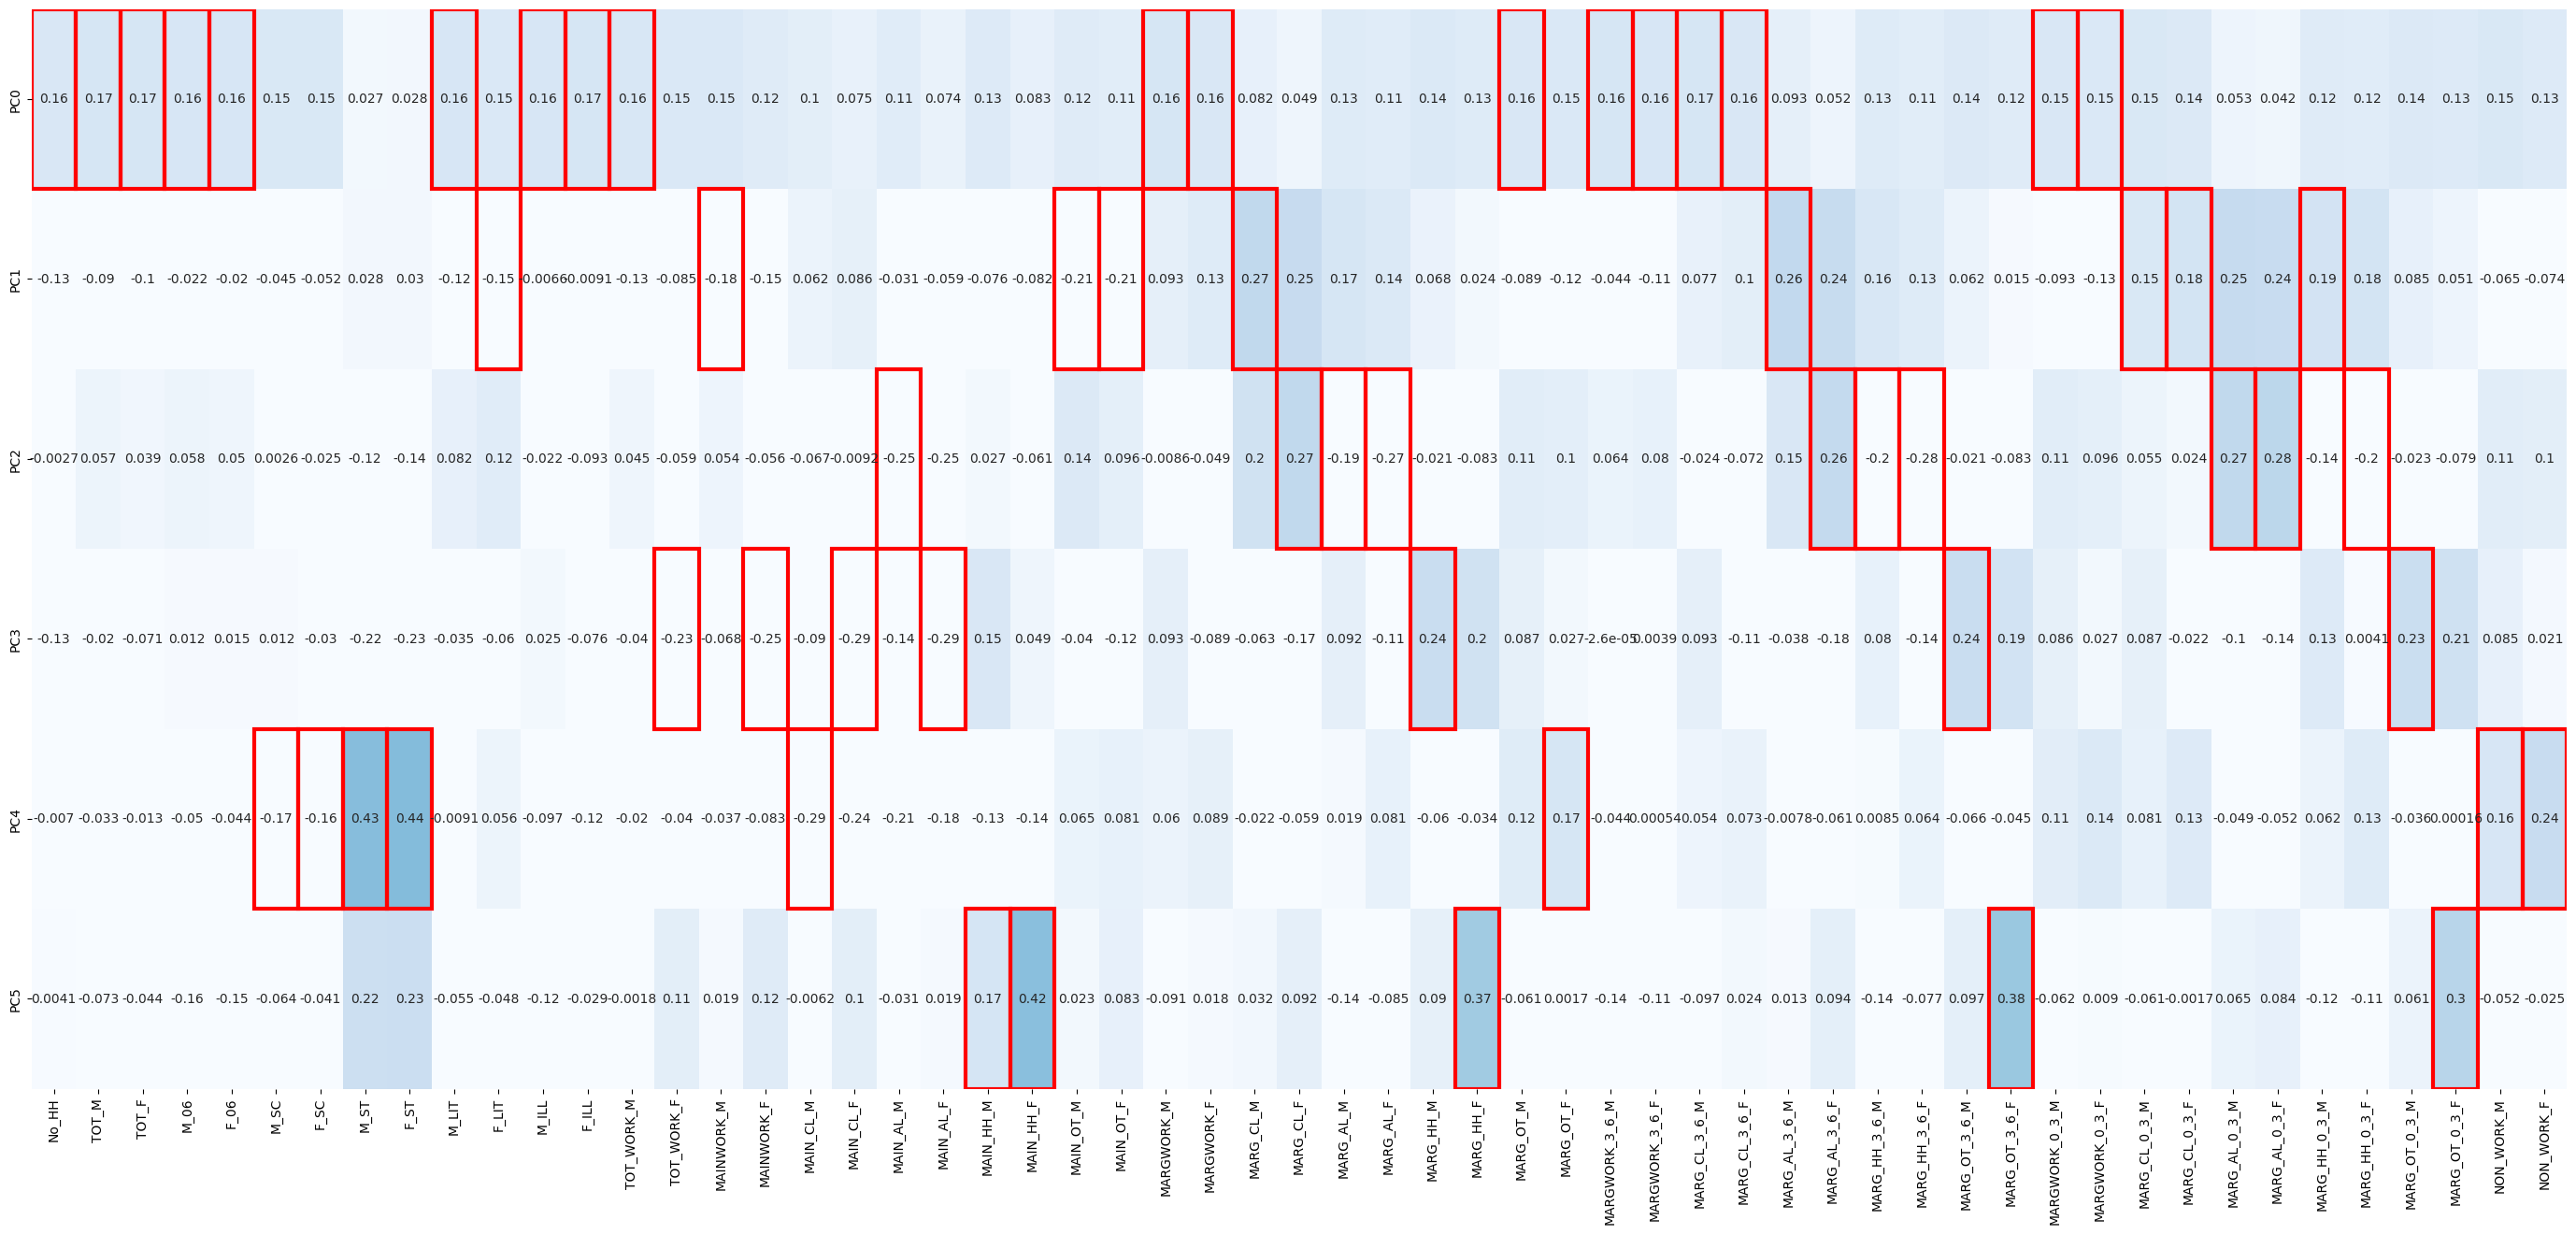

In [ ]:
fig,ax = plt.subplots(figsize=(35, 15), facecolor='w', edgecolor='k')
ax = sns.heatmap(data_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5'])

column_max = data_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(data_pca_loading.columns):
    position = data_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [42]:
df_pca = pd.DataFrame (df_pca, columns=['pc_general_pop','pc_cult_pop','pc_agri_pop','pc_oth_pop',
                                  'pc_sch_pop','pc_hh_pop'])
df_pca.head()

,pc_general_pop,pc_cult_pop,pc_agri_pop,pc_oth_pop,pc_sch_pop,pc_hh_pop
0,-4.617263,0.138116,0.328545,1.543697,0.353736,-0.420948
1,-4.771662,-0.105865,0.244449,1.963215,-0.153884,0.417308
2,-5.964836,-0.294347,0.367394,0.619543,0.478199,0.276581
3,-6.280796,-0.500384,0.212701,1.074515,0.300799,0.051157
4,-4.478566,0.894154,1.078277,0.535557,0.804065,0.341678


In [ ]:
df_pca.shape

(640, 6)

# PCA EDA

In [ ]:
data_new = pd.concat([data_cat, df_pca], axis=1)

In [ ]:
data_new.shape

(640, 8)

In [ ]:
data_new.head()

,State,Area Name,pc_general_pop,pc_cult_pop,pc_agri_pop,pc_oth_pop,pc_sch_pop,pc_hh_pop
0,Jammu & Kashmir,Kupwara,-4.617263,0.138116,0.328545,1.543697,0.353736,-0.420948
1,Jammu & Kashmir,Badgam,-4.771662,-0.105865,0.244449,1.963215,-0.153884,0.417308
2,Jammu & Kashmir,Leh(Ladakh),-5.964836,-0.294347,0.367394,0.619543,0.478199,0.276581
3,Jammu & Kashmir,Kargil,-6.280796,-0.500384,0.212701,1.074515,0.300799,0.051157
4,Jammu & Kashmir,Punch,-4.478566,0.894154,1.078277,0.535557,0.804065,0.341678


In [ ]:
data_new.describe(include='all')

,State,Area Name,pc_general_pop,pc_cult_pop,pc_agri_pop,pc_oth_pop,pc_sch_pop,pc_hh_pop
count,640,640,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,640.000000
unique,35,635,NaN,NaN,NaN,NaN,NaN,NaN
top,Uttar Pradesh,Raigarh,NaN,NaN,NaN,NaN,NaN,NaN
freq,71,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,-2.664535e-16,4.440892e-17,-4.440892e-17,8.881784e-17,1.776357e-16,0.000000
std,NaN,NaN,5.640351e+00,2.805249e+00,2.037991e+00,1.915409e+00,1.485438e+00,1.392219
min,NaN,NaN,-6.567313e+00,-1.500590e+01,-7.720581e+00,-7.224181e+00,-4.605163e+00,-7.607636
25%,NaN,NaN,-3.817830e+00,-1.099666e+00,-8.923620e-01,-8.386346e-01,-7.376262e-01,-0.476968
50%,NaN,NaN,-1.605352e+00,-2.803050e-01,5.305992e-02,3.783450e-01,-8.402658e-02,-0.034851
75%,NaN,NaN,2.496570e+00,1.056798e+00,5.356318e-01,1.033229e+00,5.289101e-01,0.386164


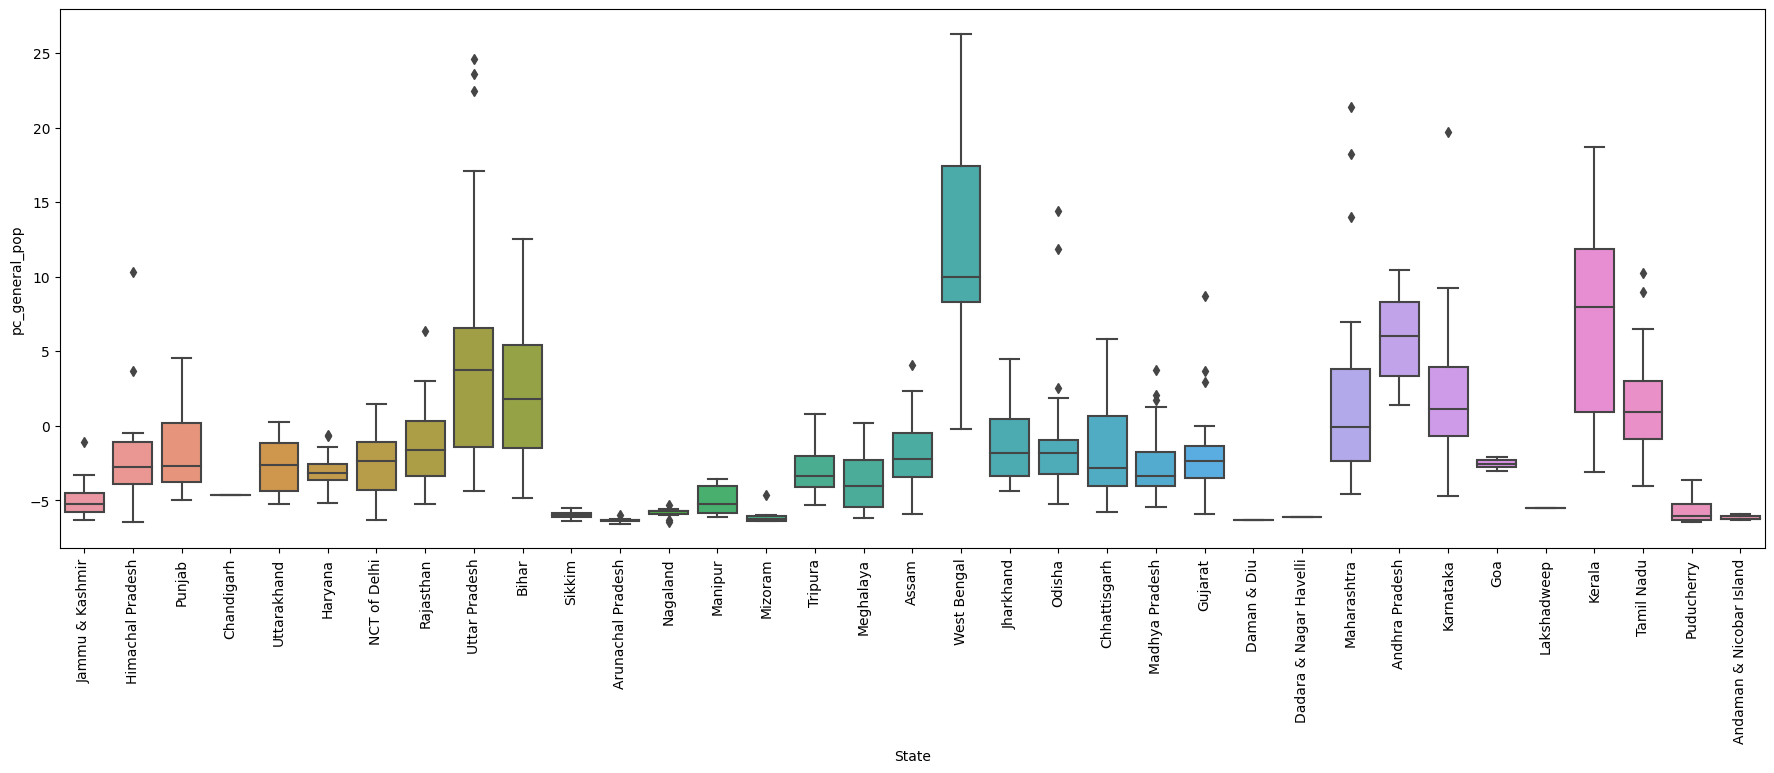

In [ ]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='State',y='pc_general_pop', data=data_new)
plt.xticks (rotation=90);

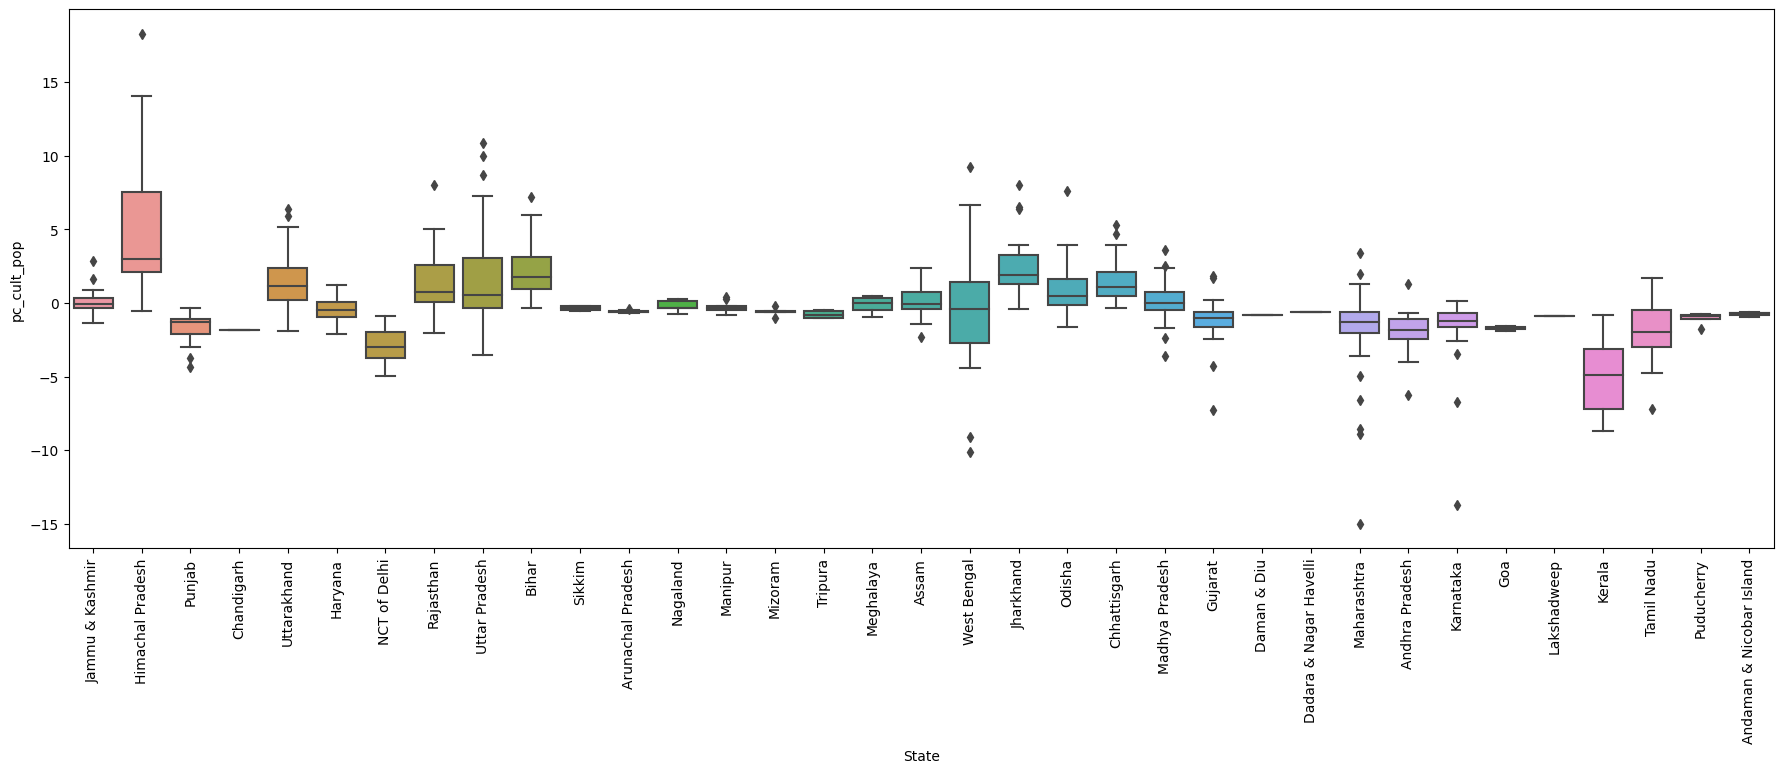

In [ ]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='State',y='pc_cult_pop', data=data_new)
plt.xticks (rotation=90);

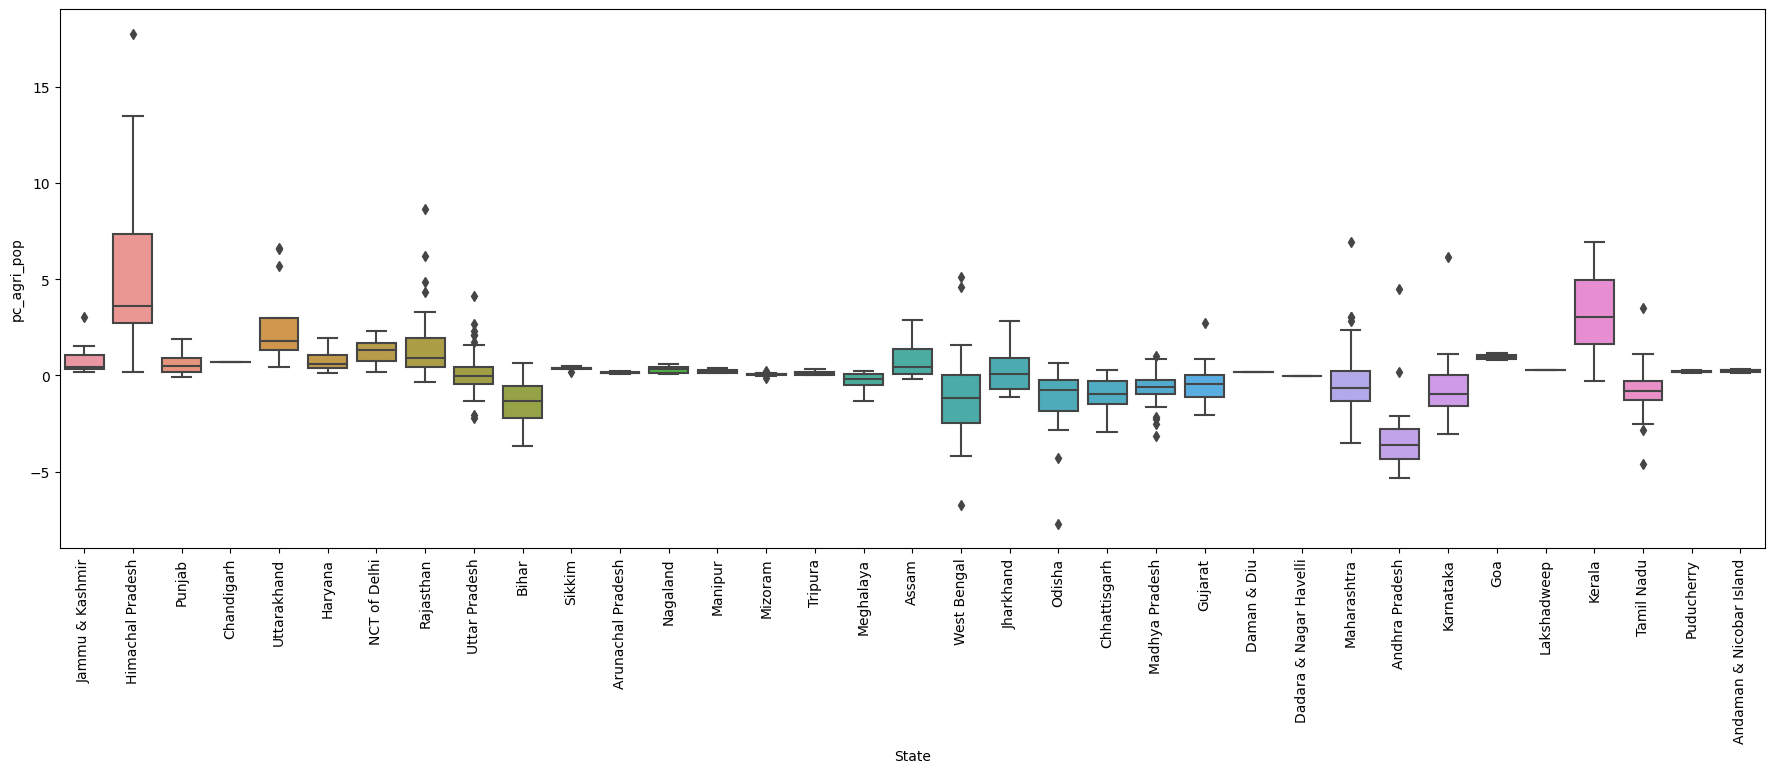

In [ ]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='State',y='pc_agri_pop', data=data_new)
plt.xticks (rotation=90);

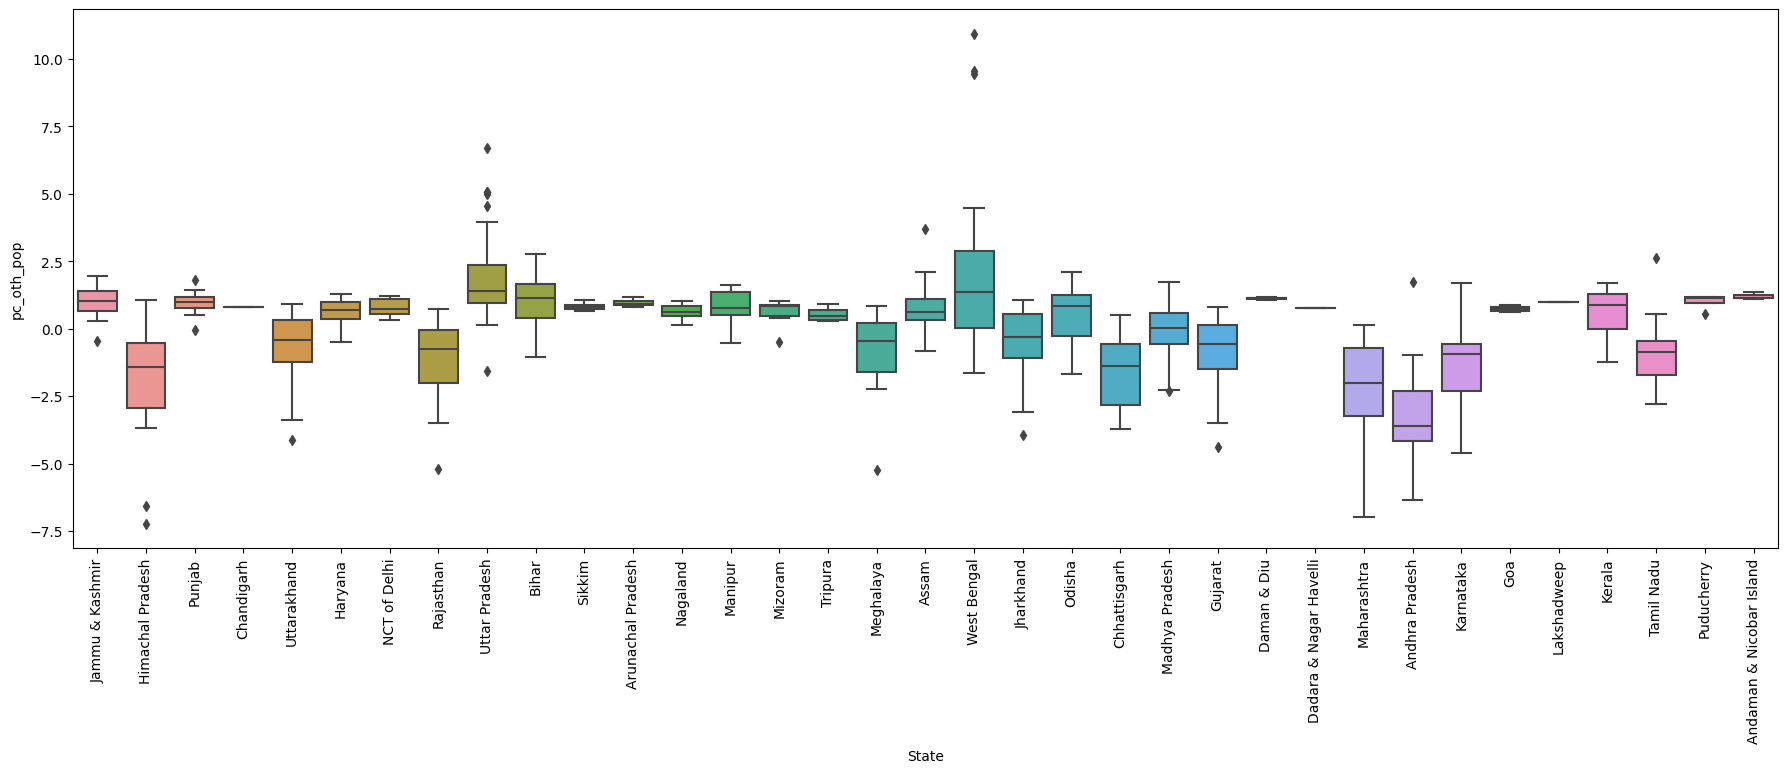

In [ ]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='State',y='pc_oth_pop', data=data_new)
plt.xticks (rotation=90);

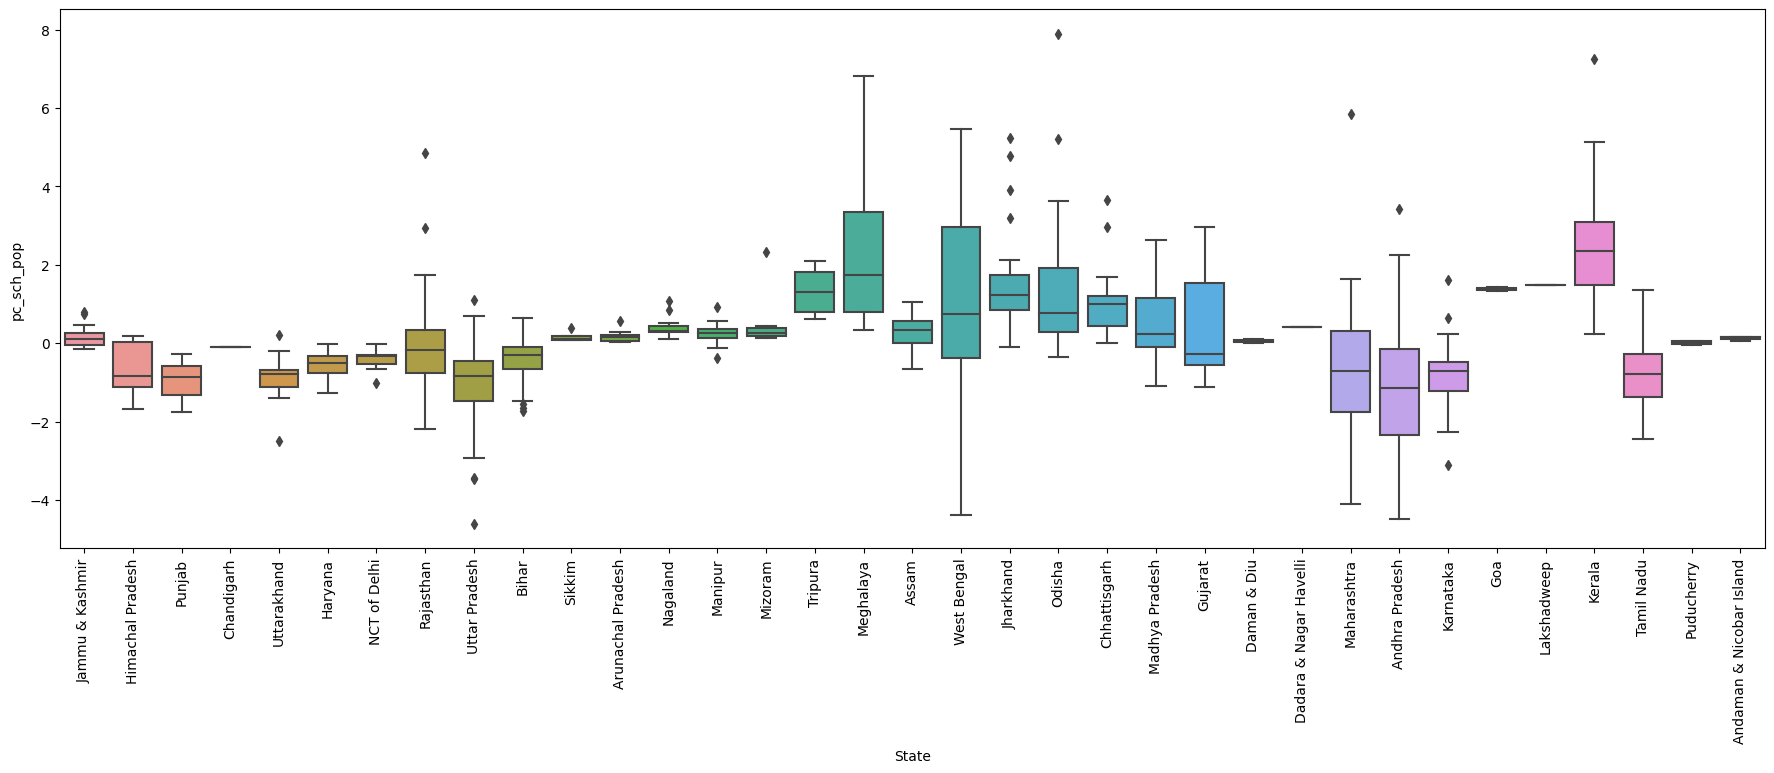

In [ ]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='State',y='pc_sch_pop', data=data_new)
plt.xticks (rotation=90);

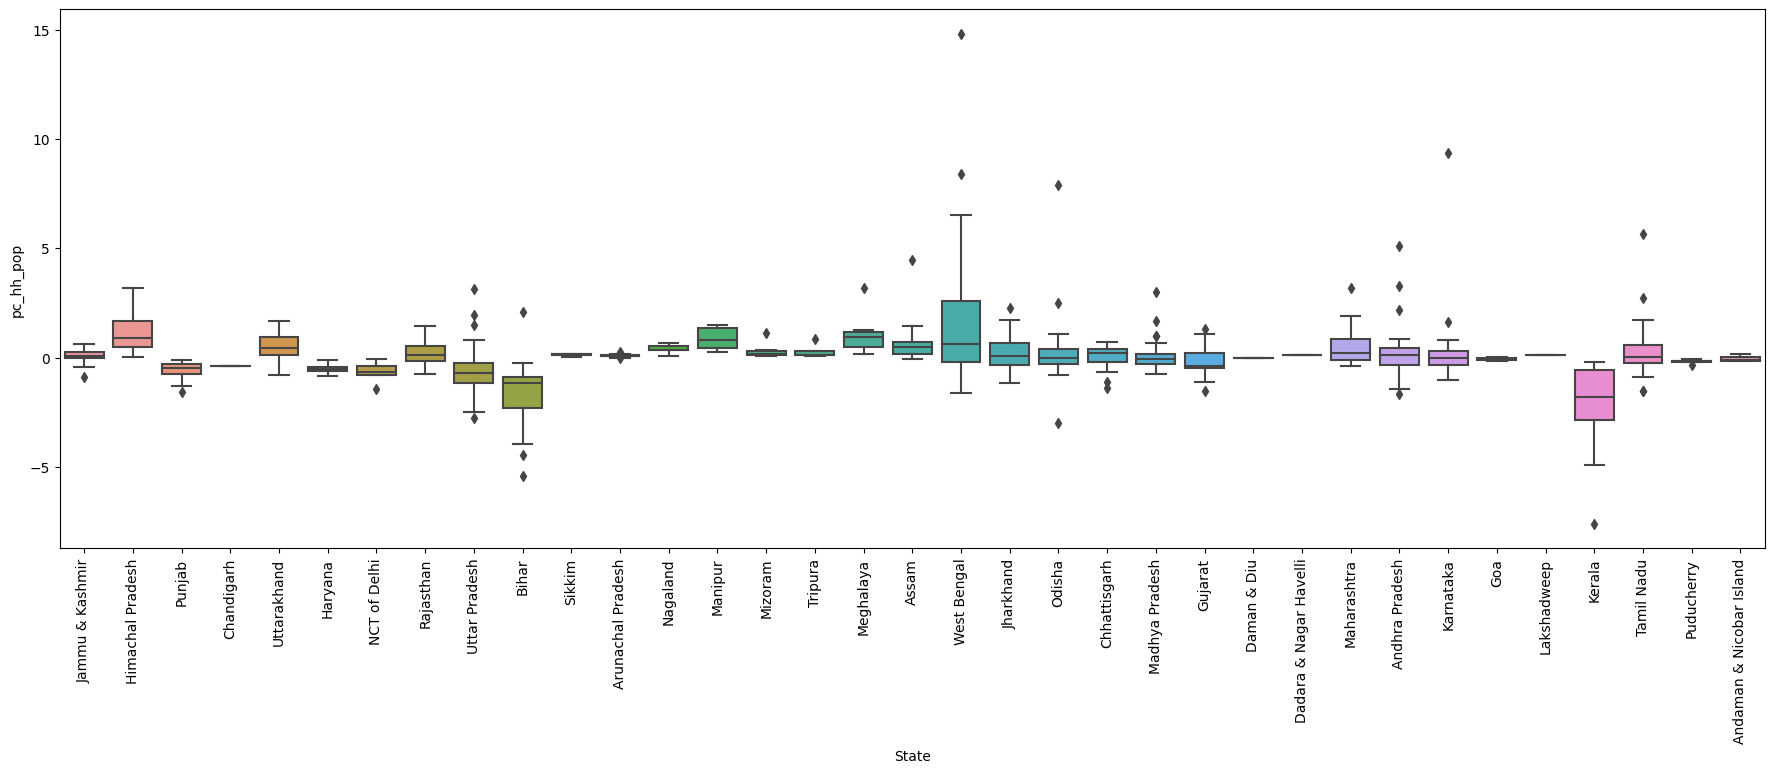

In [ ]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='State',y='pc_hh_pop', data=data_new)
plt.xticks (rotation=90);

# LINEAR EQUATION

In [43]:
for i in range(0,6):print("(",np.round(pca.components_[0][i],2),")",'*',data_scaled.columns[i], end=' + ')

( 0.16 ) * No_HH + ( 0.17 ) * TOT_M + ( 0.17 ) * TOT_F + ( 0.16 ) * M_06 + ( 0.16 ) * F_06 + ( 0.15 ) * M_SC + 